Importing the necessary libraries and the specific values needed for further calculations:

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from PIL import Image

#Jupiter's mu (according to its mass only)
mu_j=126687000

#europa eccentiricity
e_europa=0.00981

#Europa's mu (according to its mass only)
mu_e=4.799844*10**22*6.6743*10**(-20)

#mu value with consideration both Europa's and Jupıter's masses
mu_e_j=(1898.13*10**24+4.799844*10**22)*6.6743*10**(-20)

#Parking orbit altitude of Jupiter
r_parking_jupiter=71492+1793

#Parking orbit altitude of Europa
r_parking_europa=1560.80+100

#Semimajor axes of Europa's orbit around Jupiter
r_apogee_europa=671261

#Importing the images for the further visualization
europa=plt.imread('europa.png')
jupyter=plt.imread('jupyter.jpg')
anu=plt.imread('ANU.png')

Defining all the equations for the further calculations:

In [99]:
#Angular momentum calculation
def calculate_h(r,true_anomaly,e,mu):
    h=np.sqrt(r*mu*(1+e*np.cos(true_anomaly)))
    return h

#Velocity calculation at the any point on the orbit
def calculate_velocity(h,r,e,true_anomaly,mu):
    v_dik=h/r
    v_r=mu/h*(e*np.sin(true_anomaly))
    v=np.sqrt(v_dik**2+v_r**2)
    return v

#Transfer orbit's angular momentum
def find_h_transfer_orbit(ta_a,ta_b,r_a,r_b,mu):
    h=np.sqrt(r_a*r_b*mu)*np.sqrt((np.cos(ta_a)-np.cos(ta_b))/(r_a*np.cos(ta_a)-r_b*np.cos(ta_b)))
    return h

#Transfer orbit's eccentricity
def find_eccentiricty_transfer_orbit(ta_a,ta_b,r_a,r_b,mu):
    e=(-r_a+r_b)/(r_a*np.cos(ta_a)-r_b*np.cos(ta_b))
    return e

#The position on the any orbit
def orbital_position(h,e,mu,true_anomaly):
    r=h**2/(mu*(1+e*np.cos(true_anomaly)))
    return r

#Calcualte sphere of influence
def calculate_SOI(mass_jupyter,mass_europa,sma_europa):
    r_soi=sma_europa*(mass_jupyter/mass_europa)**(2/5)
    return r_soi

#Calculate time of flight for hohmann transfer
def calculate_flight_time_elliptic(e,h,true_anomaly,mu):
    E=2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(true_anomaly/2))  
    M_e=E-e*np.sin(E) 
    time=M_e*h**3/((mu**2)*(1-e**2)**(3/2)) 
    return time

#Kepler equaion for elliptic (iteration)
def keplers_equation_elliptic(e,time,h,mu,):
    # M=E-esinE
    M_e=(mu**2)*(1-e**2)**(3/2)*time/h**3
    E_i=M_e
    error=1
    while error > 1e-10:
        E_i_1=M_e+e*np.sin(E_i)
        error=np.abs(E_i_1-E_i)
        E_i=E_i_1
    return E_i_1

#Calculate the flight time at the hyperbolic trajectory
def calculate_time_flight_hyperboli(e, h, true_anomaly, mu):
    # Handle the singularity near 90 degrees using cotangent
    cot_half_angle = 1 / np.tan(true_anomaly / 2)
    
    # Calculate the flight anomaly
    F = 2 * np.arctan(np.sqrt((e - 1) / (e + 1)) * cot_half_angle)
    
    # Calculate mean anomaly
    M_h = e * np.sinh(F) - F
    
    # Calculate time of flight
    time = M_h * h**3 / ((mu**2) * (e**2 - 1)**(3/2))
    
    return time

#Kepler equaion for hyperbolic trajectory (iteration)
def keplers_equation_hyperbolic(e,time,h,mu):
    # M=esinhF-F
    M_h=(mu**2)*(e**2-1)**(3/2)*time/h**3
    F_i=M_h
    error=1
    while error > 1e-10:
        F_i_1=np.arcsinh((F_i+M_h)/e)
        error=np.abs(F_i_1-F_i)
        F_i=F_i_1
    return F_i_1


def rotate_180_degrees(x, y):
    rotated_x = -x
    rotated_y = -y
    return rotated_x, rotated_y

Resizing the images of jupiter, europa, and satellite for the further animations:

In [130]:
# Load the original images using PIL
jupyter = Image.open('Jupyter.jpg')
europa = Image.open('Europa.png')
anu = Image.open('ANU.png')

# Resize the images while maintaining transparency
jupyter.thumbnail((200, 200), Image.ANTIALIAS)
europa.thumbnail((300, 300), Image.ANTIALIAS)
anu.thumbnail((200, 200), Image.ANTIALIAS)

# Save the resized images with a transparent background as PNG
jupyter.save('resized_jupyter.png', 'PNG')
europa.save('resized_europa.png', 'PNG')
anu.save('resized_satellite.png', 'PNG')

anu_n=plt.imread('resized_satellite.png')
europa_n=plt.imread('resized_europa.png')
jupyter_n=plt.imread('resized_jupyter.png')

europa.thumbnail((85, 85), Image.ANTIALIAS)
anu.thumbnail((100, 100), Image.ANTIALIAS)

europa.save('resized_europa.png', 'PNG')
anu.save('resized_satellite.png', 'PNG')

anu_n_=plt.imread('resized_satellite.png')
europa_n_=plt.imread('resized_europa.png')


C:\Users\enes\AppData\Local\Temp\ipykernel_3852\2234873940.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  jupyter.thumbnail((200, 200), Image.ANTIALIAS)
C:\Users\enes\AppData\Local\Temp\ipykernel_3852\2234873940.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  europa.thumbnail((300, 300), Image.ANTIALIAS)
C:\Users\enes\AppData\Local\Temp\ipykernel_3852\2234873940.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  anu.thumbnail((200, 200), Image.ANTIALIAS)
C:\Users\enes\AppData\Local\Temp\ipykernel_3852\2234873940.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  europa.thumbnail((85, 85), Image.ANTIALIAS)
C:\Users\enes\AppData\Local\Temp\ipykernel_3852\2234873940.

In [157]:
def plot_by_time_eliptic(flight_time,e,h_satellite,mu,counter,jupyter,h_europa,europa,time_hohmann):
    #europa
    semiperiod_europa=calculate_flight_time_elliptic(0,h_europa,np.pi,mu_e_j)
    time_start=semiperiod_europa-time_hohmann
    flight_time_europa=time_start+flight_time
    time_array_europa=np.linspace(time_start,flight_time_europa,200)
    E_europa=[keplers_equation_elliptic(0,t,h_europa,mu_e_j) for t in time_array_europa]
    true_anomaly__europa=[2*np.arctan((np.sqrt((1+0)/(1-0)))*np.tan(i/2)) for i in E_europa]
    position_europa=[orbital_position(h_europa,0,mu_e_j,i) for i in true_anomaly__europa]
    x_europa=position_europa*np.cos(true_anomaly__europa)
    y_europa=position_europa*np.sin(true_anomaly__europa)
    # satellite
    time_array=np.linspace(0,flight_time,200)
    E_satellite=[keplers_equation_elliptic(e,t,h_satellite,mu) for t in time_array ]
    true_anomaly_satellite=[2*np.arctan((np.sqrt((1+e)/(1-e)))*np.tan(i/2)) for i in E_satellite]
    position_satellite=[orbital_position(h_satellite,e,mu,i) for i in true_anomaly_satellite]
    x_satellite=position_satellite*np.cos(true_anomaly_satellite)
    y_satellite=position_satellite*np.sin(true_anomaly_satellite)
    
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.plot(x_satellite, y_satellite, label='Satellite Orbit')
    ax.plot(x_europa, y_europa, label='Europa Orbit')
    # Assuming jupyter image is square, adjust the aspect ratio accordingly
    #aspect_ratio = jupyter.shape[1] / jupyter.shape[0]
    ax.set_aspect('equal', adjustable='box', anchor='C')
    
    # Set labels and title
    ax.set_xlabel('X-axis (km)')
    ax.set_ylabel('Y-axis (km)')
    ax.set_title('Hohmann Transfer Orbit Over Time')

    # Add legend
    ax.legend()

    # Save the plot
    
    plt.ylim(-100000,700000)
    plt.xlim(-800000,100000)
   
    # Add Jupiter image
    loc=len(x_europa)
    imagebox = OffsetImage(jupyter, zoom=0.5, resample=True)
    ab = AnnotationBbox(imagebox, (0,0), frameon=False)
    ax.add_artist(ab)
    imagebox = OffsetImage(europa_n_, zoom=0.5, resample=True)
    ab_ = AnnotationBbox(imagebox, (x_europa[loc-1], y_europa[loc-1]), frameon=False)
    ax.add_artist(ab_)
    imagebox = OffsetImage(anu_n_, zoom=0.5, resample=True)
    ab_1= AnnotationBbox(imagebox, (x_satellite[loc-1], y_satellite[loc-1]), frameon=False)
    ax.add_artist(ab_1)
    plt.savefig('plots/hohmann_hyprblc_trjctry_0_{}.png'.format(counter))
    plt.show()
    plt.close()
    return 

In [155]:
def plot_by_time_hyper(flight_time,e_hyper,h_hyper,counter,current_time):
    time_array=np.linspace(flight_time,current_time,200)
    F=[keplers_equation_hyperbolic(e_hyper,t,h_hyper,mu_e) for t in time_array]
    #true_anomaly_satellite=[2*np.arctanh((np.sqrt((1+e_hyper)/(1-e_hyper)))*np.tan(i/2)) for i in F]
    true_anomaly_satellite = [2 * np.arctan(np.sqrt((e_hyper + 1) / (e_hyper - 1)) * (1 / np.tan(i / 2))) for i in F]
    position_satellite=[orbital_position(h_hyper,e_hyper,mu_e,i) for i in true_anomaly_satellite]
    x_satellite=position_satellite*np.cos(true_anomaly_satellite)
    y_satellite=position_satellite*np.sin(true_anomaly_satellite)
    x,y=rotate_180_degrees(x_satellite,y_satellite)
    # Create a new figure and axis
    
    ####
    
    ####
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.plot(x, y, label='Hyperbolic Orbit')
   
    # Assuming jupyter image is square, adjust the aspect ratio accordingly
    #aspect_ratio = jupyter.shape[1] / jupyter.shape[0]
    ax.set_aspect('equal', adjustable='box', anchor='C')
    
    # Set labels and title
    ax.set_xlabel('X-axis (km)')
    ax.set_ylabel('Y-axis (km)')
    ax.set_title('Hyperbolic Approaching to Europa Over Time')

    # Add legend
    ax.legend()

    # Save the plot
    
    plt.ylim(-10000,30000)
    plt.xlim(-10000,10000)
   
    # Add Jupiter image
    
    loc=len(x)
    imagebox = OffsetImage(europa_n, zoom=0.1, resample=True)
    ab_ = AnnotationBbox(imagebox, (0,0), frameon=False)
    ax.add_artist(ab_)
    imagebox = OffsetImage(anu_n, zoom=0.1, resample=True)
    ab_1= AnnotationBbox(imagebox, (x[loc-1], y[loc-1]), frameon=False)
    ax.add_artist(ab_1)
    plt.savefig('plots/hohmann_hyprblc_trjctry_1_{}.png'.format(counter))
    plt.show()
    plt.close()
    
    return F

In [158]:
def plot_parking_europa(counter,flight_time,r_parking_europa,v_parking_europa,h_parking_europa,h_hyper,e_hyper):
    time_array=np.linspace(470,0,200)
    F=[keplers_equation_hyperbolic(e_hyper,t,h_hyper,mu_e) for t in time_array]
    #true_anomaly_satellite=[2*np.arctanh((np.sqrt((1+e_hyper)/(1-e_hyper)))*np.tan(i/2)) for i in F]
    true_anomaly_satellite = [2 * np.arctan(np.sqrt((e_hyper + 1) / (e_hyper - 1)) * (1 / np.tan(i / 2))) for i in F]
    position_satellite=[orbital_position(h_hyper,e_hyper,mu_e,i) for i in true_anomaly_satellite]
    x_satellite=position_satellite*np.cos(true_anomaly_satellite)
    y_satellite=position_satellite*np.sin(true_anomaly_satellite)
    x,y=rotate_180_degrees(x_satellite,y_satellite)


    time_array_2=np.linspace(0,flight_time,200)
    E_satellite=[keplers_equation_elliptic(0,t,h_parking_europa,mu_e) for t in time_array_2 ]
    true_anomaly_satellite=[2*np.arctan((np.sqrt((1+0)/(1-0)))*np.tan(i/2)) for i in E_satellite]
    position_satellite=[orbital_position(h_parking_europa,0,mu_e,i) for i in true_anomaly_satellite]
    x_satellite_p=position_satellite*np.cos(true_anomaly_satellite)*(-1)
    y_satellite_p=position_satellite*np.sin(true_anomaly_satellite)*(-1)

    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.plot(x, y, label='Hyperbolic Part of Orbit')
    ax.plot(x_satellite_p, y_satellite_p, label='Parking Orbit')
    # Assuming jupyter image is square, adjust the aspect ratio accordingly
    #aspect_ratio = jupyter.shape[1] / jupyter.shape[0]
    ax.set_aspect('equal', adjustable='box', anchor='C')
    
    # Set labels and title
    ax.set_xlabel('X-axis (km)')
    ax.set_ylabel('Y-axis (km)')
    ax.set_title('Entering to Parking Orbit of Europa Over Time')

    # Add legend
    ax.legend()

    # Save the plot
    
    plt.ylim(-10000,30000)
    plt.xlim(-10000,10000)
   
    # Add Jupiter image
    
    loc=len(x_satellite_p)
    imagebox = OffsetImage(europa_n, zoom=0.1, resample=True)
    ab_ = AnnotationBbox(imagebox, (0,0), frameon=False)
    ax.add_artist(ab_)
    imagebox = OffsetImage(anu_n, zoom=0.1, resample=True)
    ab_1= AnnotationBbox(imagebox, (x_satellite_p[loc-1], y_satellite_p[loc-1]), frameon=False)
    ax.add_artist(ab_1)
    plt.savefig('plots/hohmann_hyprblc_trjctry_2_{}.png'.format(counter))
    plt.show()
    plt.close()    

    
    return


In [159]:
def apply_hohmann(r_parking_jupiter,r_apogee_europa):
    h_parking_jupiter=calculate_h(r_parking_jupiter,0,0,mu_j)
    e_hohmann=find_eccentiricty_transfer_orbit(0,np.pi,r_parking_jupiter,r_apogee_europa,mu_j)
    h_hohmann=find_h_transfer_orbit(0,np.pi,r_parking_jupiter,r_apogee_europa,mu_j)
    h_europa=calculate_h(r_apogee_europa,np.pi,0,mu_e_j)
    
    
    v_1=calculate_velocity(h_parking_jupiter,r_parking_jupiter,0,0,mu_j)
    v_2=calculate_velocity(h_hohmann,r_parking_jupiter,e_hohmann,0,mu_j)
    d_v_hohmann=np.abs(v_2-v_1)
    t_hohmann=calculate_flight_time_elliptic(e_hohmann,h_hohmann,np.pi,mu_j)
    v_apogee=calculate_velocity(h_hohmann,r_apogee_europa,e_hohmann,np.pi,mu_j)
    v_apogee_europa=h_europa/r_apogee_europa
    return d_v_hohmann,t_hohmann,e_hohmann,h_hohmann,h_europa,v_apogee,v_apogee_europa
    

In [160]:
d_v_hohmann,time_hohmann,e_hohmann,h_hohmann,h_europa,v_apogee_hohmann,v_apogee_europa=apply_hohmann(r_parking_jupiter,r_apogee_europa)

In [161]:
def apply_hypr(r_parking_europa,v_apogee_hohmann):
    v_inf=np.abs(v_apogee_hohmann-v_apogee_europa)
    h_hyper=r_parking_europa*np.sqrt(v_inf**2+2*mu_e/r_parking_europa)
    e_hyper=h_hyper**2/(mu_e*r_parking_europa)-1
    theta_inf=np.arccos(-1/e_hyper)
    v_perigee_hyper=h_hyper/r_parking_europa
    h_parking_europa=calculate_h(r_parking_europa,0,0,mu_e)
    v_parking_europa=h_parking_europa/r_parking_europa
    d_v_2=np.abs(v_parking_europa-v_perigee_hyper)
    t_hyper=calculate_time_flight_hyperboli(e_hyper,h_hyper,theta_inf,mu_e)
    return d_v_2,t_hyper,e_hyper,h_hyper,v_perigee_hyper,v_inf,h_parking_europa,v_parking_europa,theta_inf

In [162]:
d_v_2,t_hyper,e_hyper,h_hyper,v_perigee_hyper,v_inf,h_parking_europa,v_parking_europa,theta_inf=apply_hypr(r_parking_europa,v_apogee_hohmann)

In [163]:
def create_animation(flight_time,e_hohmann,h_hohmann,h_europa):
    time_array=np.linspace(0,flight_time,51)
    print(time_array)
   
    for i in range(len(time_array)):
        plot_by_time_eliptic(time_array[i],e_hohmann,h_hohmann,mu_j,i,jupyter,h_europa,europa,flight_time)
        
    return 

In [164]:
def create_animation_park(flight_time,r_parking_europa,v_parking_europa,h_parking_europa,h_hyper,e_hyper):
    time_array=np.linspace(0,flight_time,51)
    print(time_array)
   
    for i in range(len(time_array)):
        plot_parking_europa(i,time_array[i],r_parking_europa,v_parking_europa,h_parking_europa,h_hyper,e_hyper)
        
    return 

In [165]:
def create_animation_hyper(flight_time,e_hyper,h_hyper):
    time_array=np.linspace(flight_time,0,51)
    print(time_array)
   
    for i in range(len(time_array)):
        plot_by_time_hyper(flight_time,e_hyper,h_hyper,i,time_array[i])
        
    return 

[    0.          1267.96174541  2535.92349081  3803.88523622
  5071.84698162  6339.80872703  7607.77047243  8875.73221784
 10143.69396325 11411.65570865 12679.61745406 13947.57919946
 15215.54094487 16483.50269027 17751.46443568 19019.42618109
 20287.38792649 21555.3496719  22823.3114173  24091.27316271
 25359.23490811 26627.19665352 27895.15839892 29163.12014433
 30431.08188974 31699.04363514 32967.00538055 34234.96712595
 35502.92887136 36770.89061676 38038.85236217 39306.81410758
 40574.77585298 41842.73759839 43110.69934379 44378.6610892
 45646.6228346  46914.58458001 48182.54632542 49450.50807082
 50718.46981623 51986.43156163 53254.39330704 54522.35505244
 55790.31679785 57058.27854326 58326.24028866 59594.20203407
 60862.16377947 62130.12552488 63398.08727028]


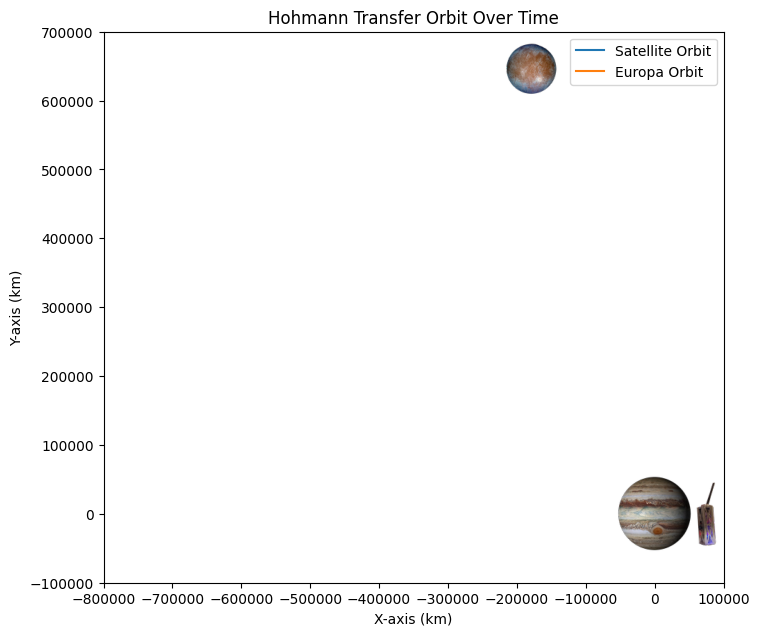

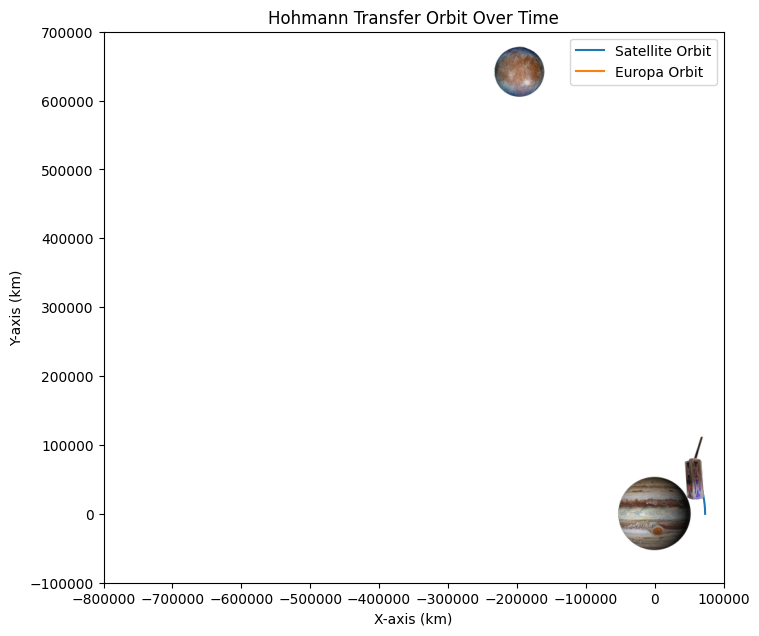

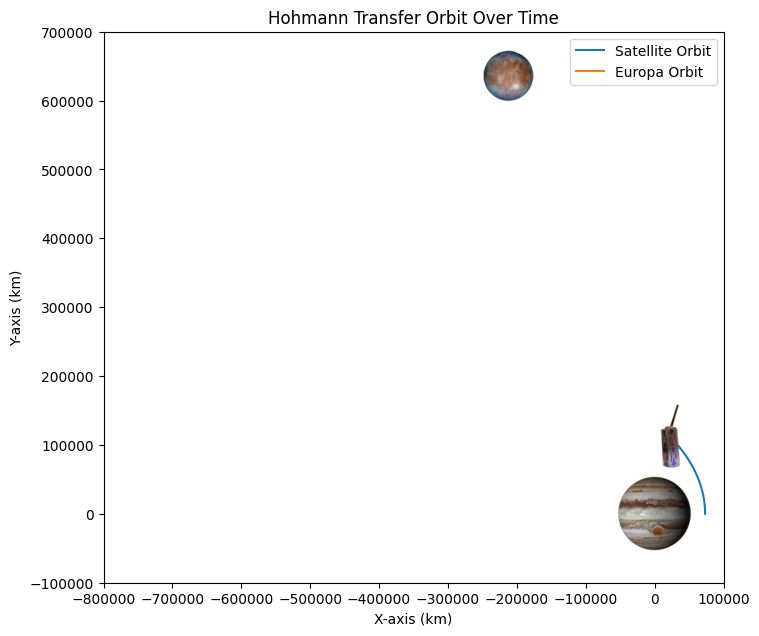

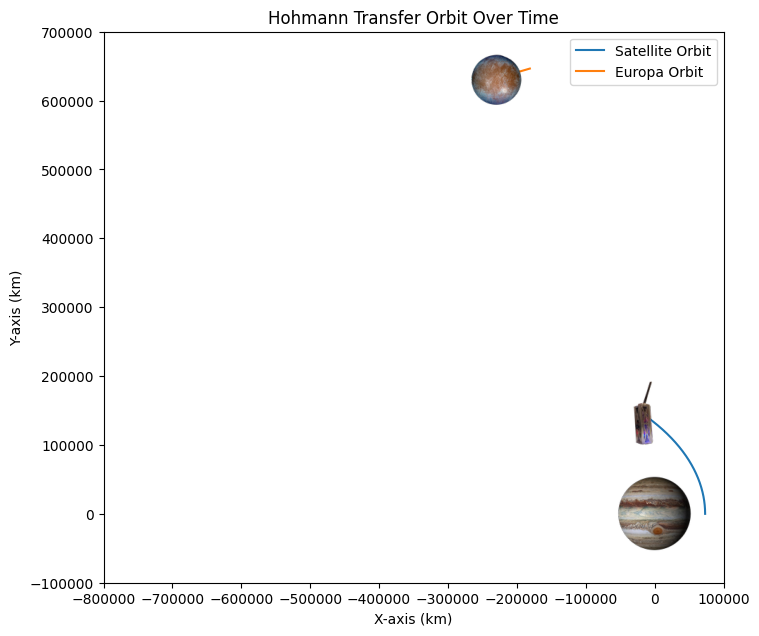

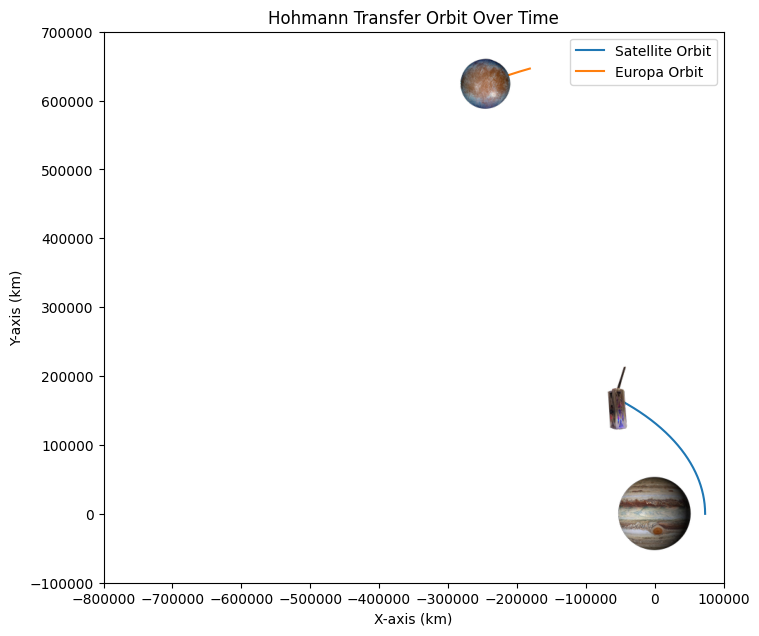

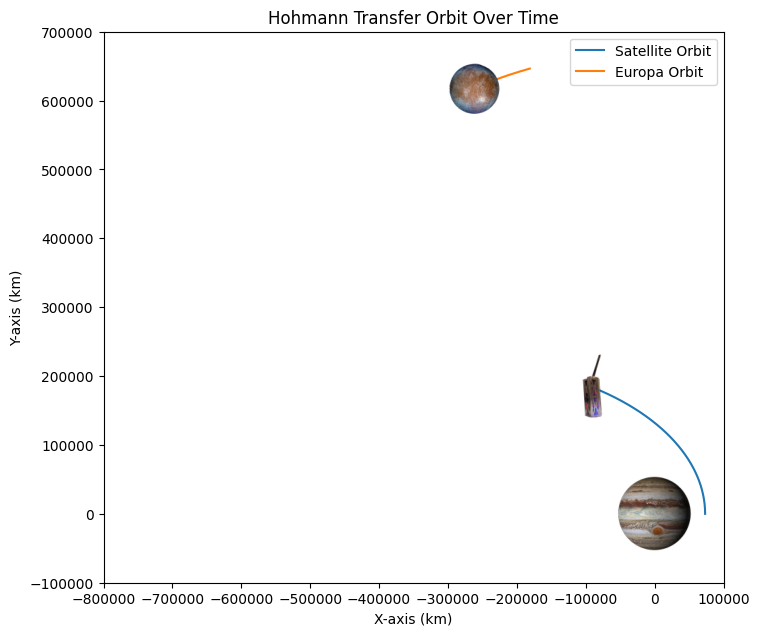

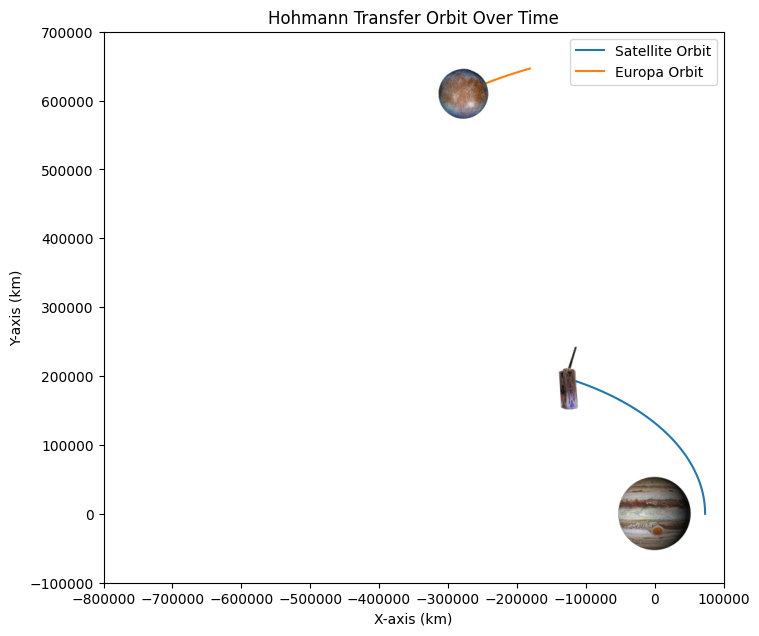

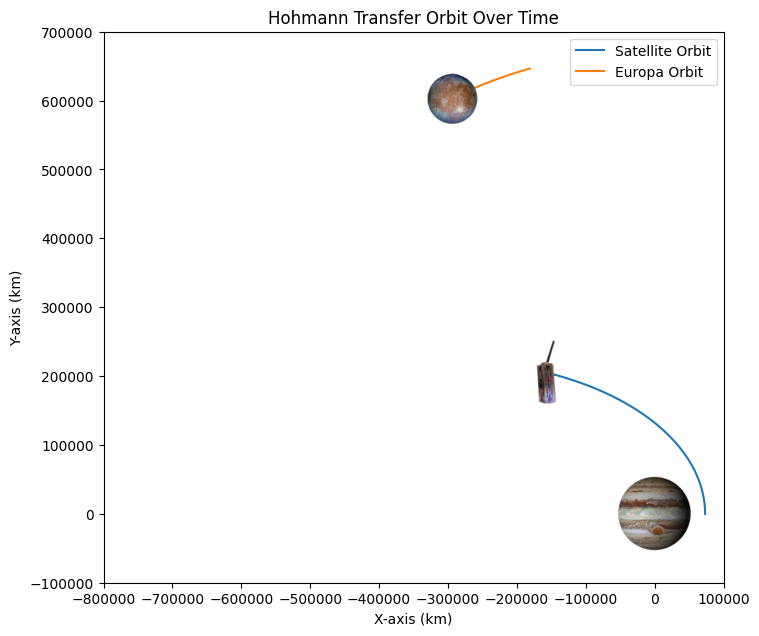

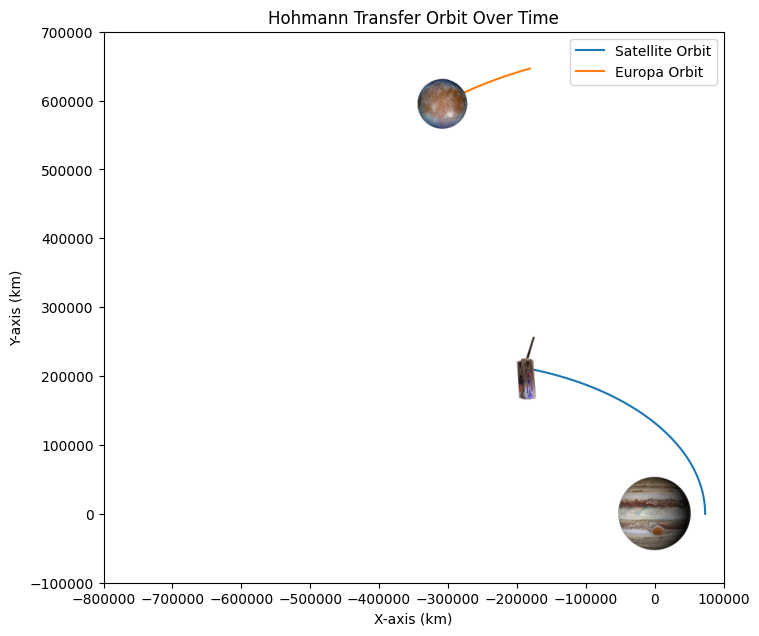

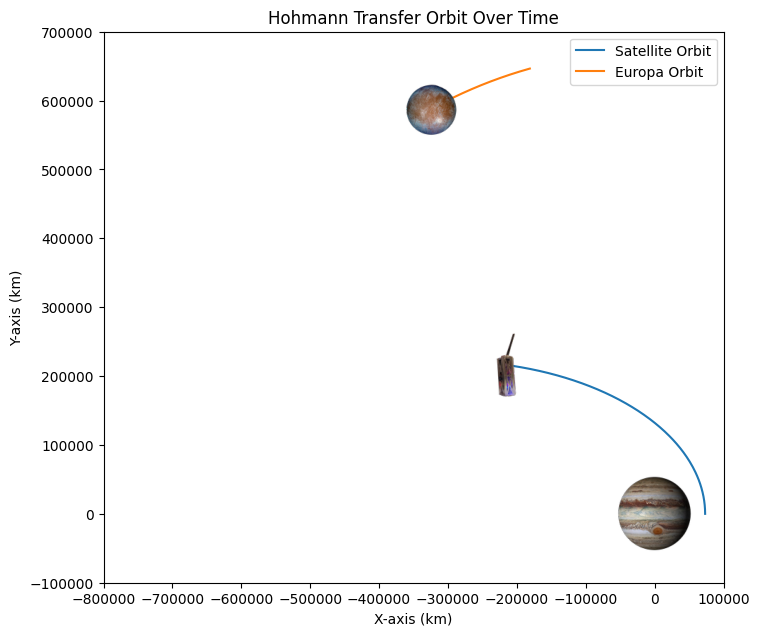

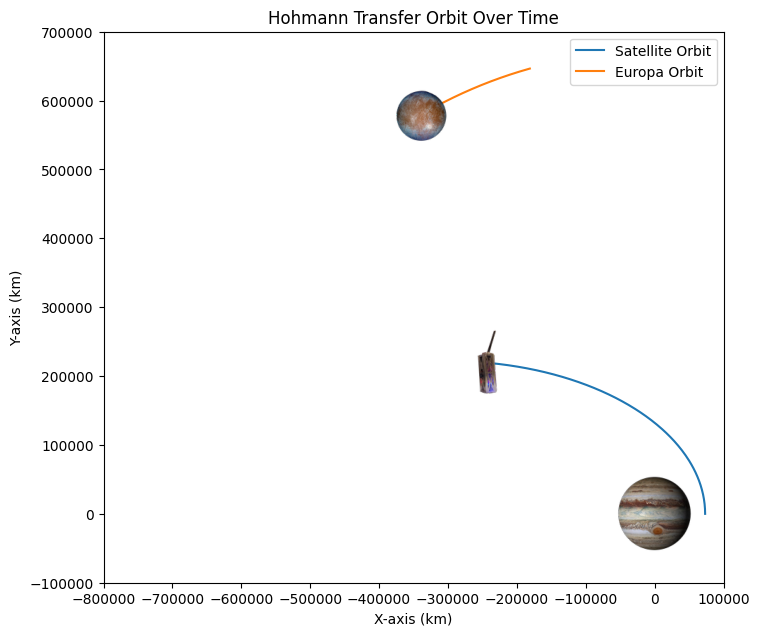

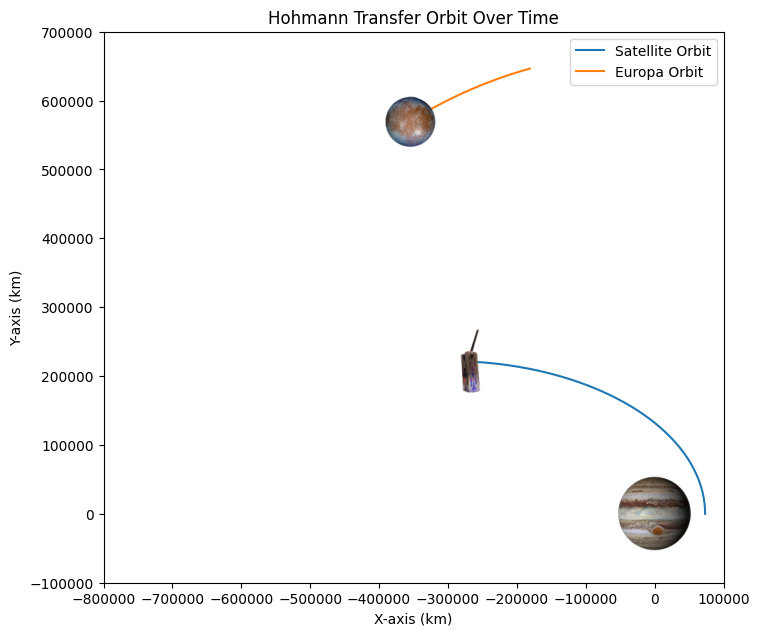

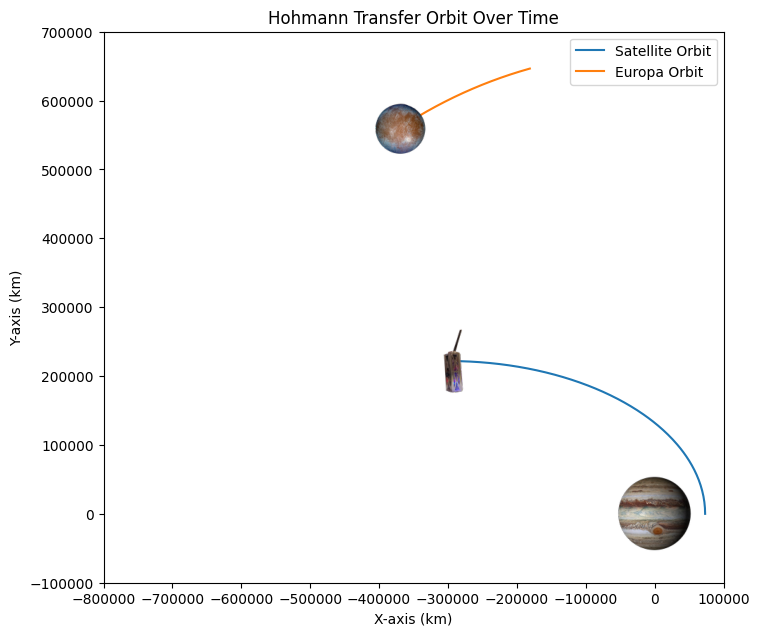

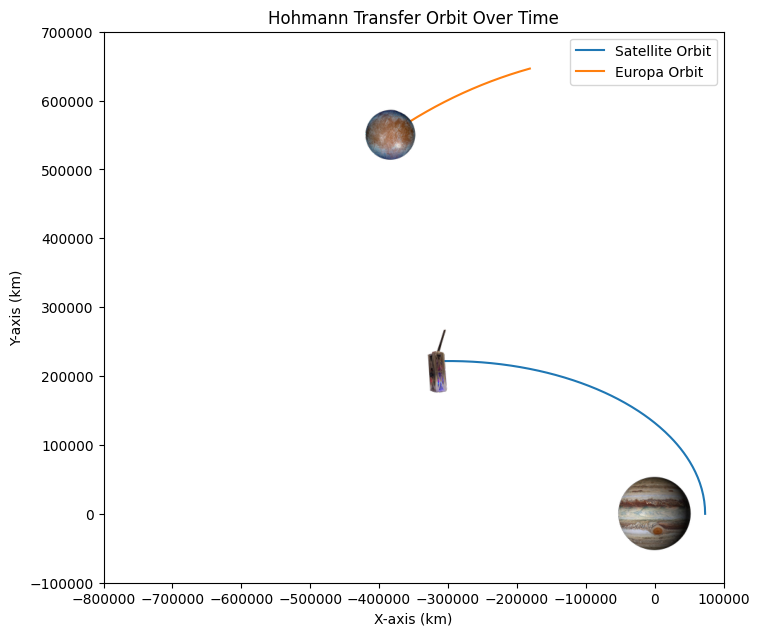

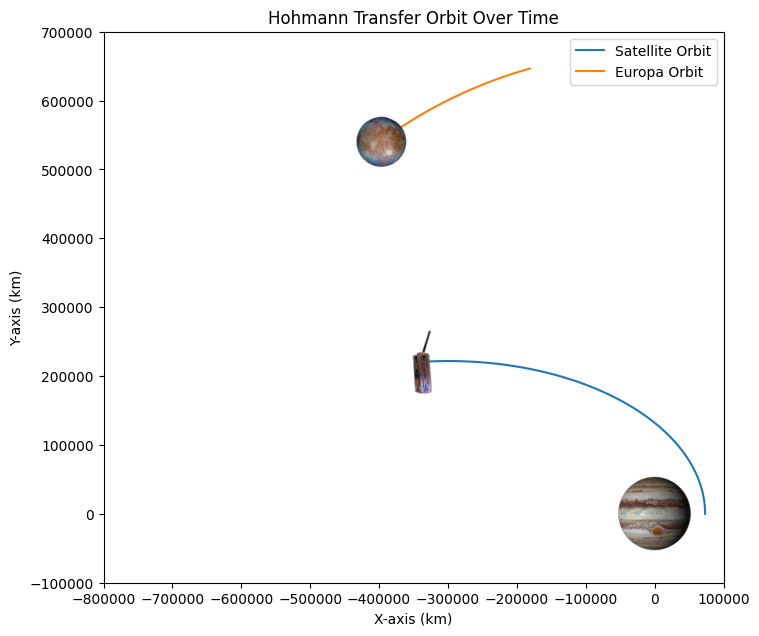

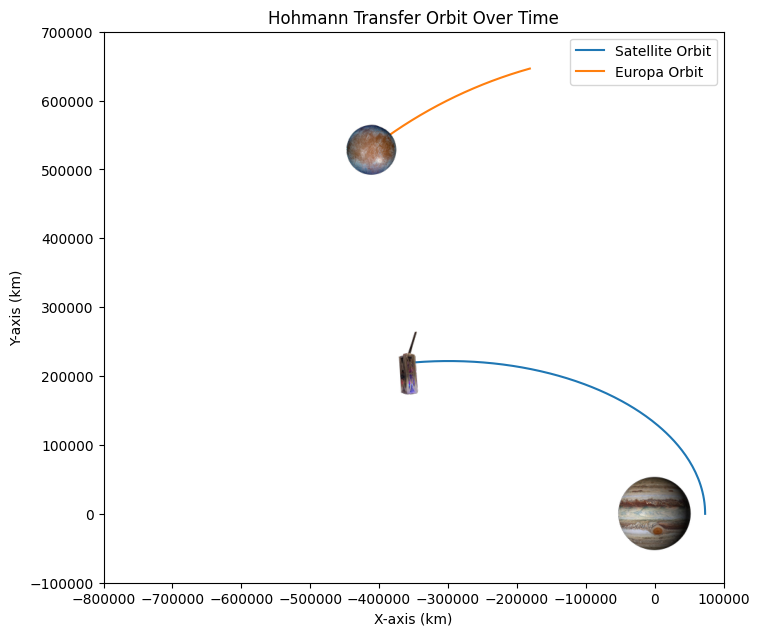

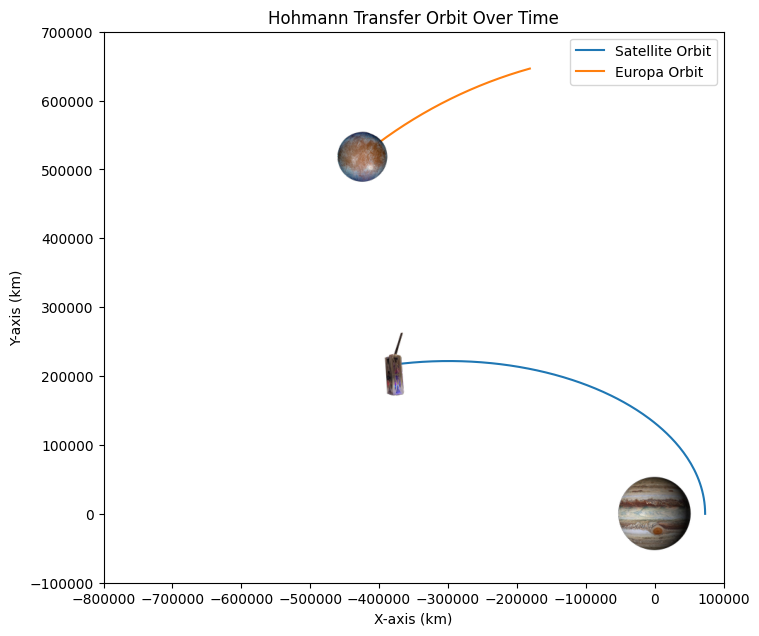

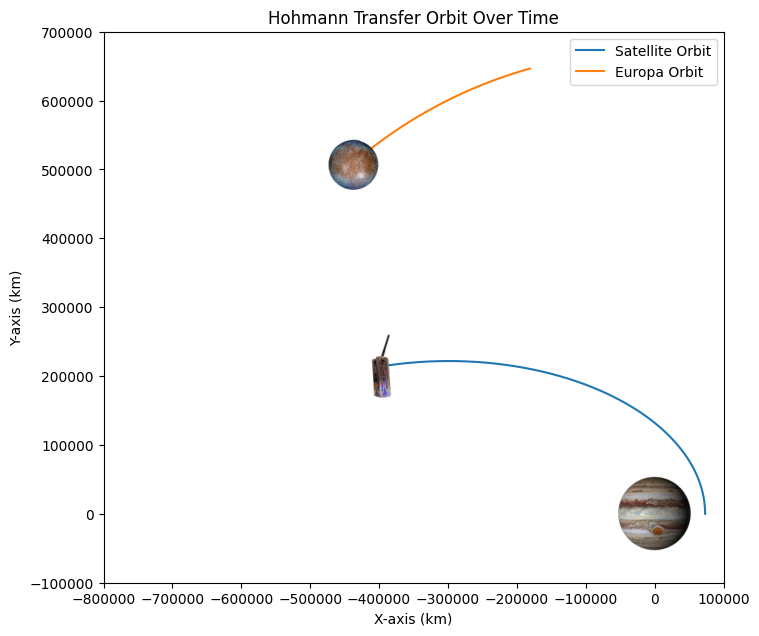

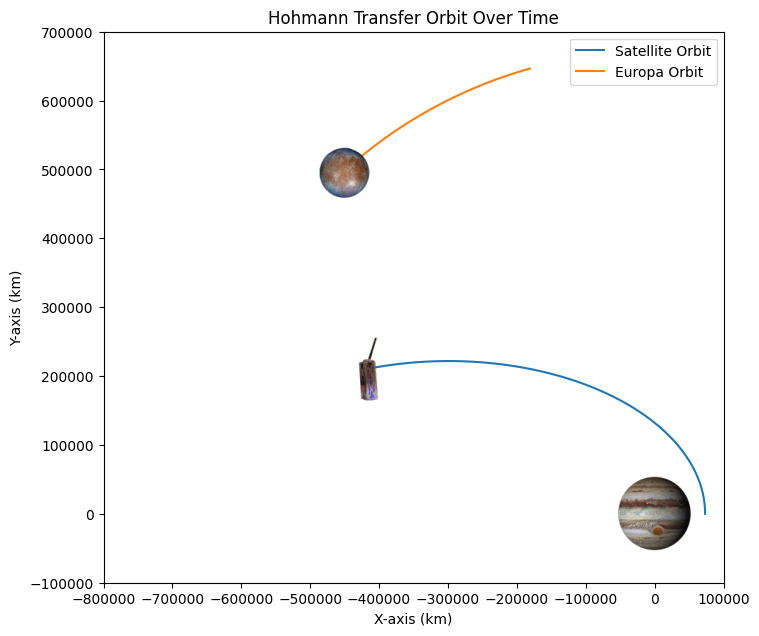

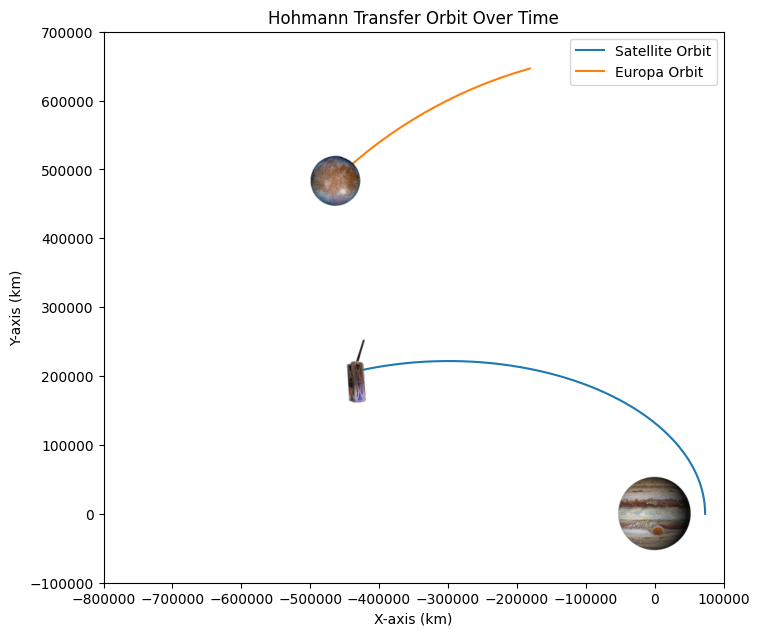

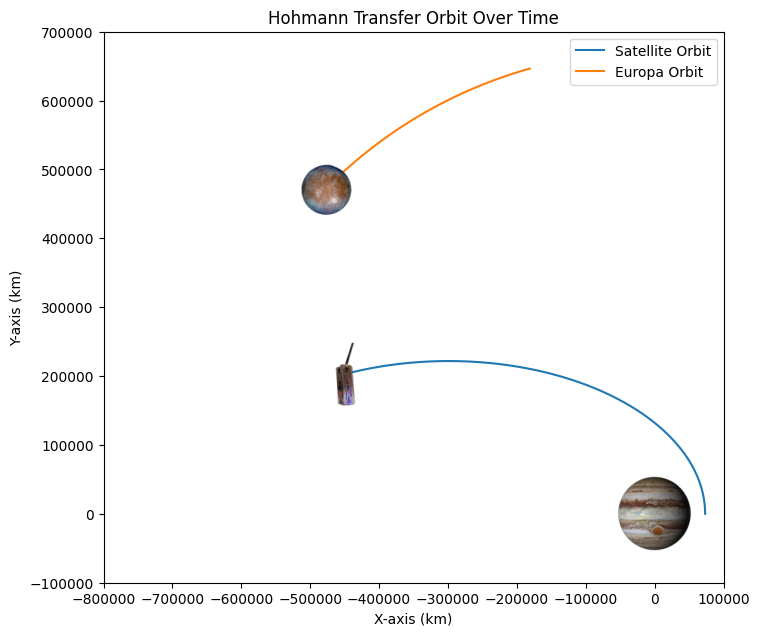

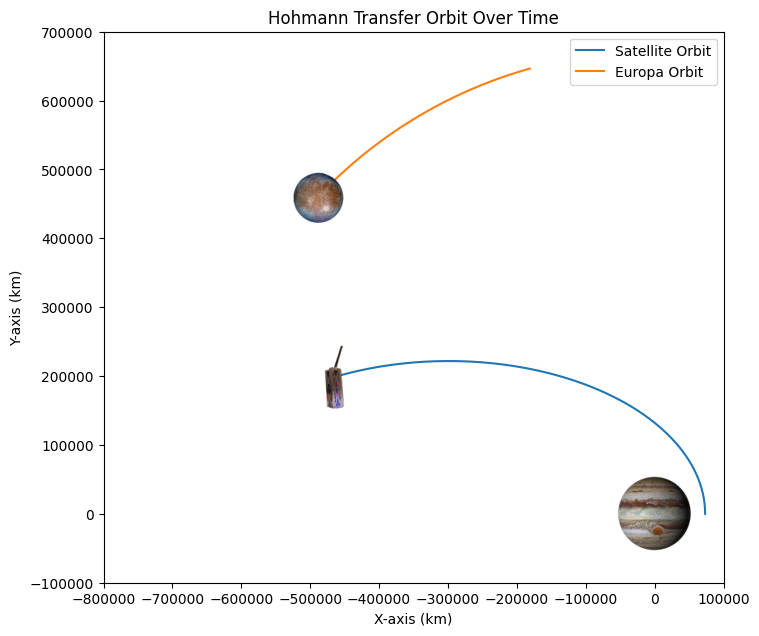

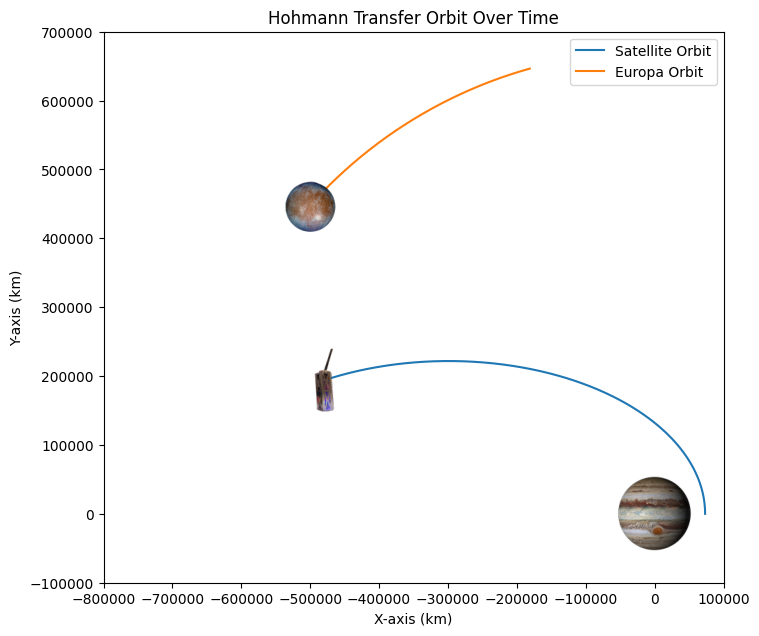

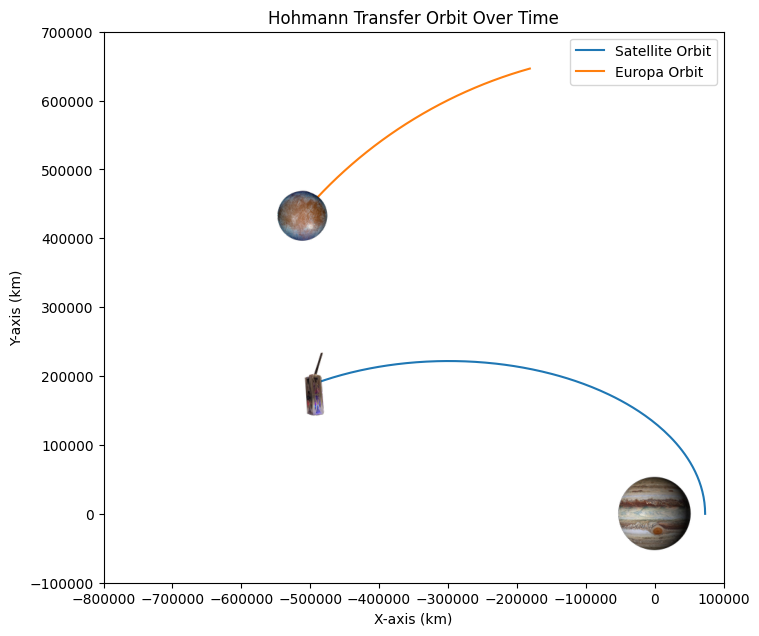

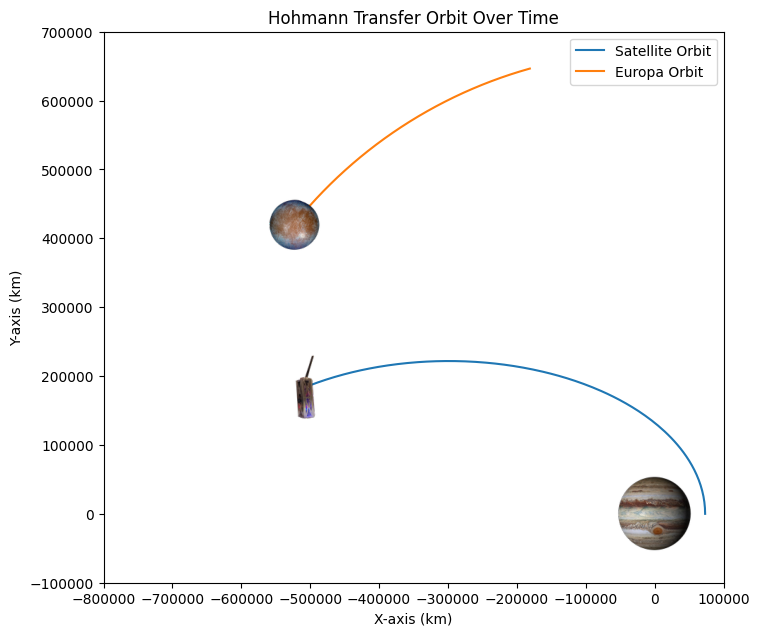

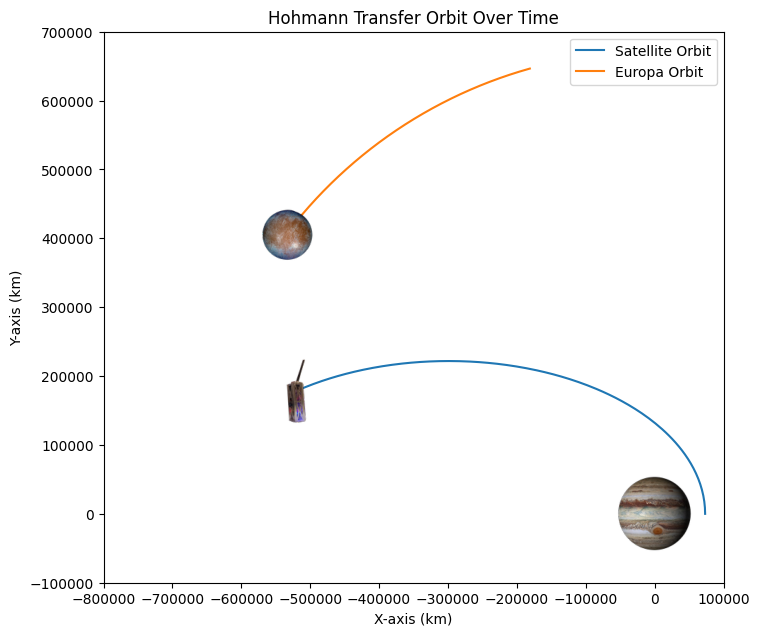

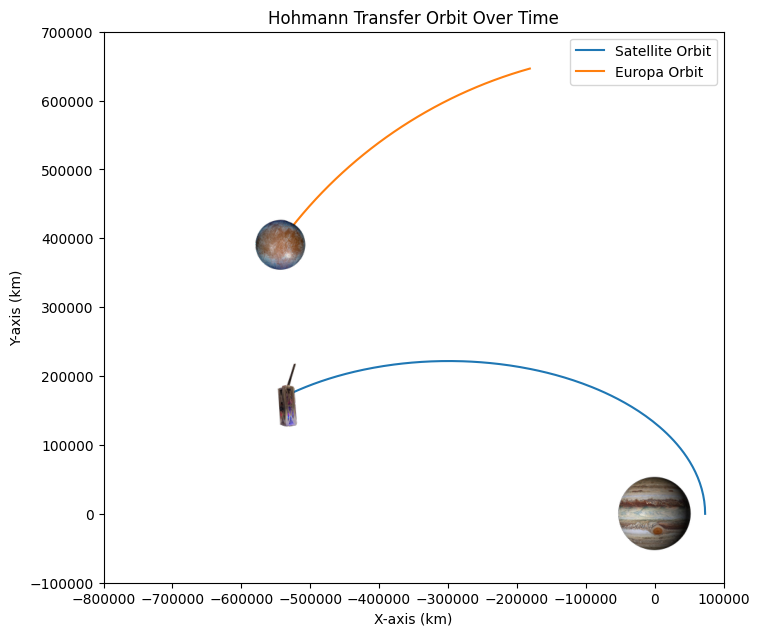

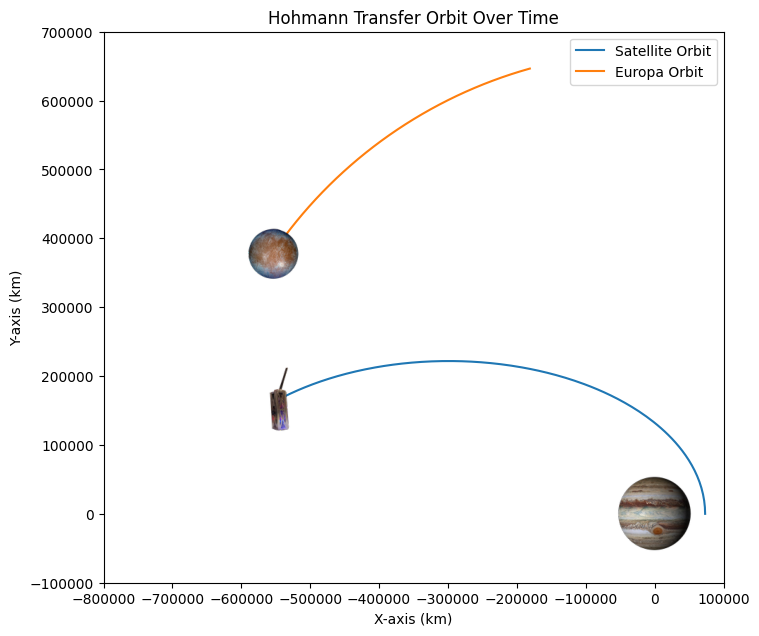

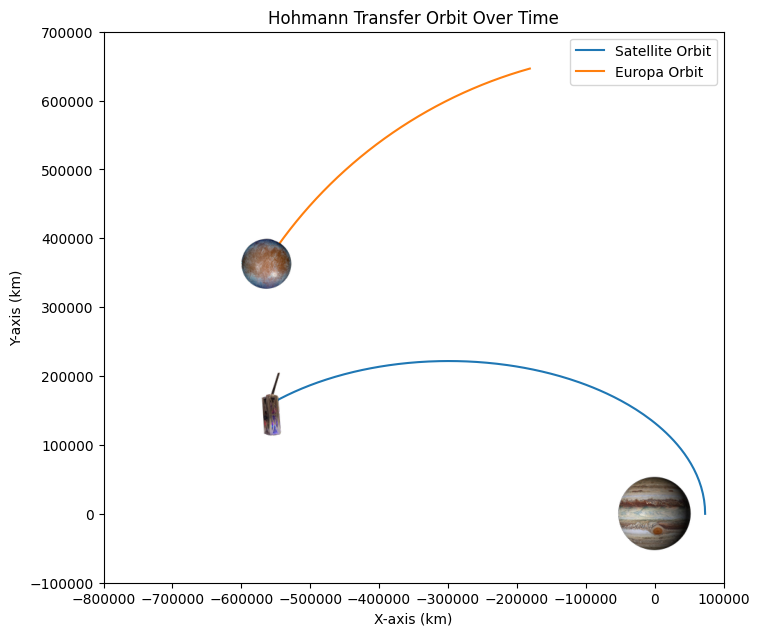

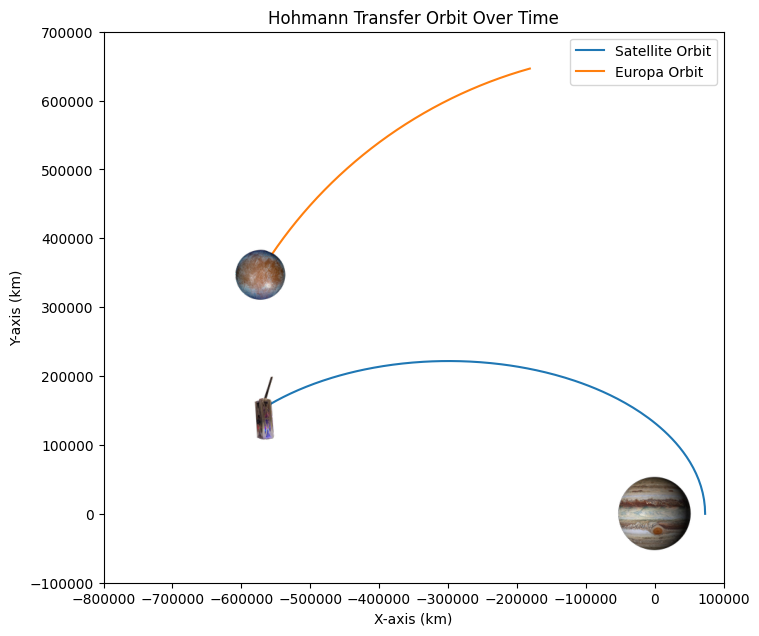

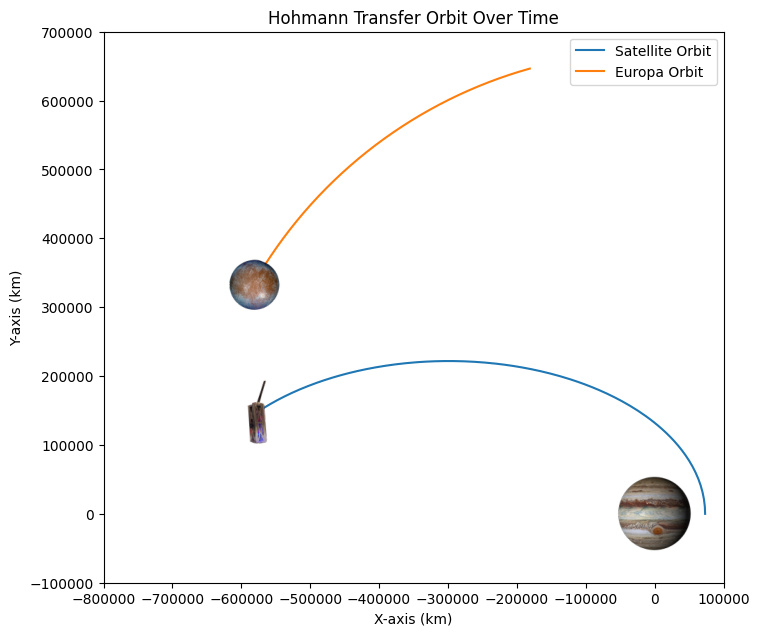

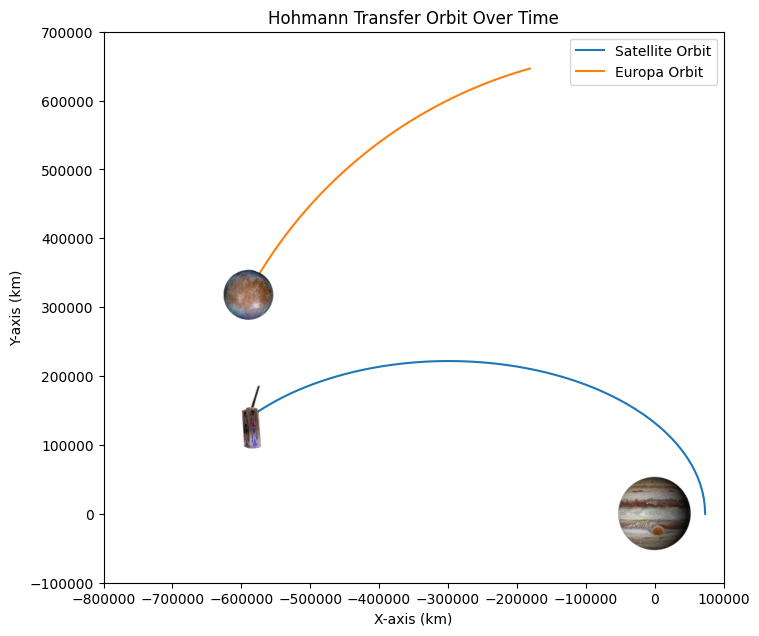

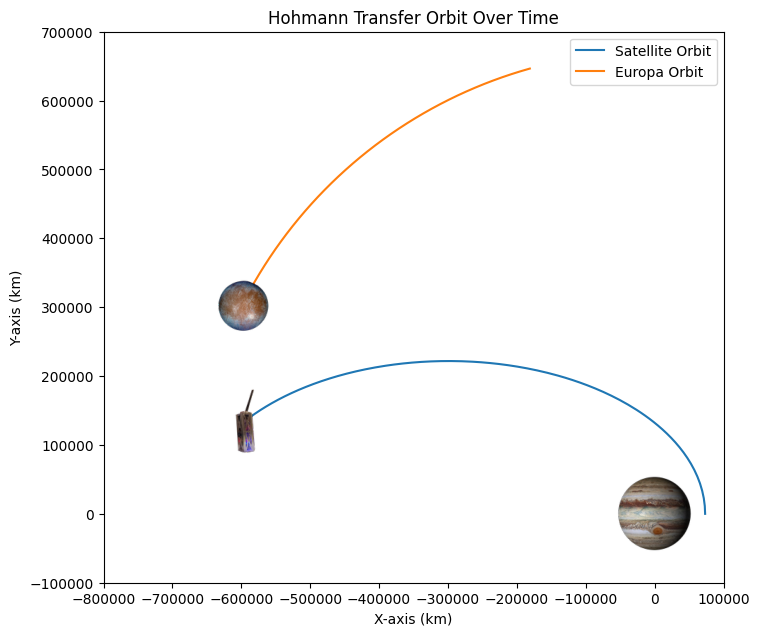

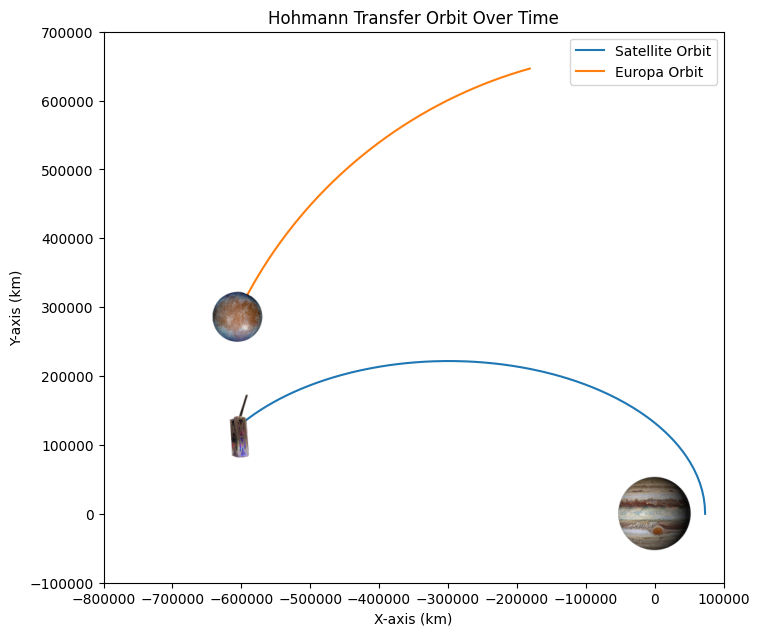

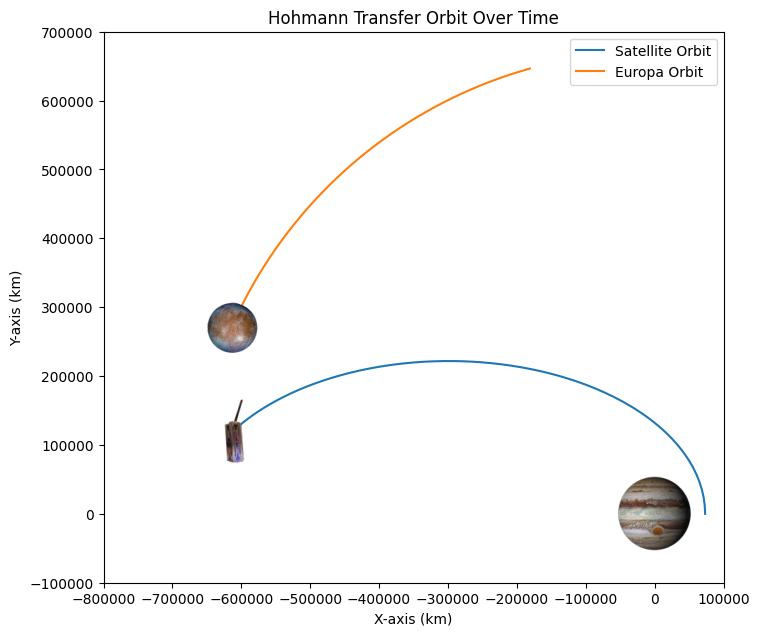

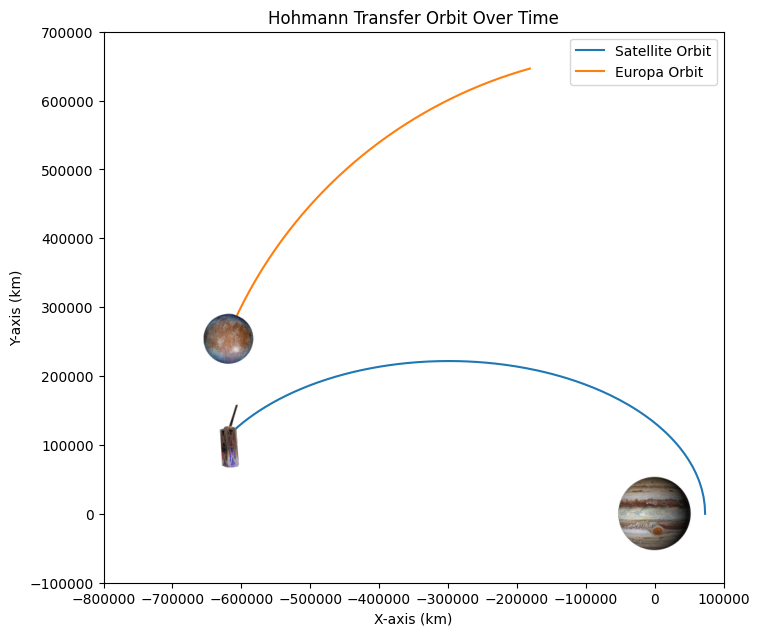

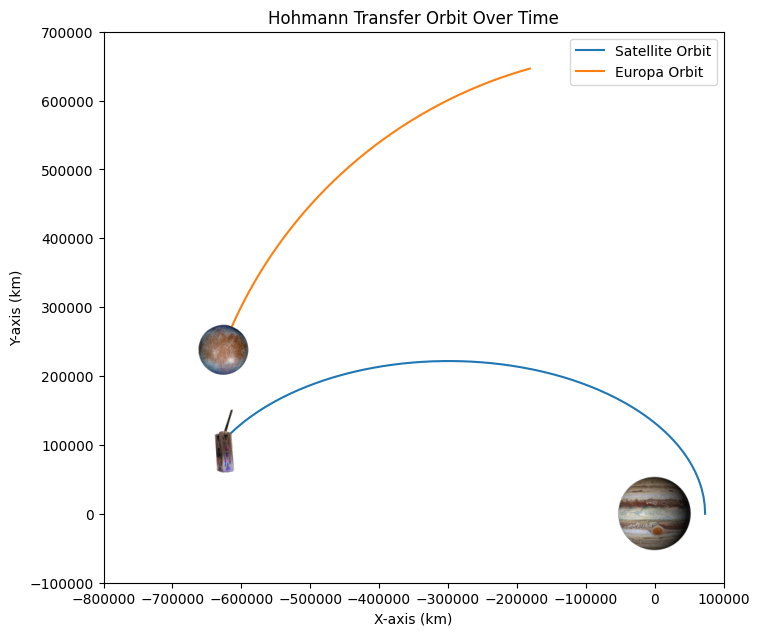

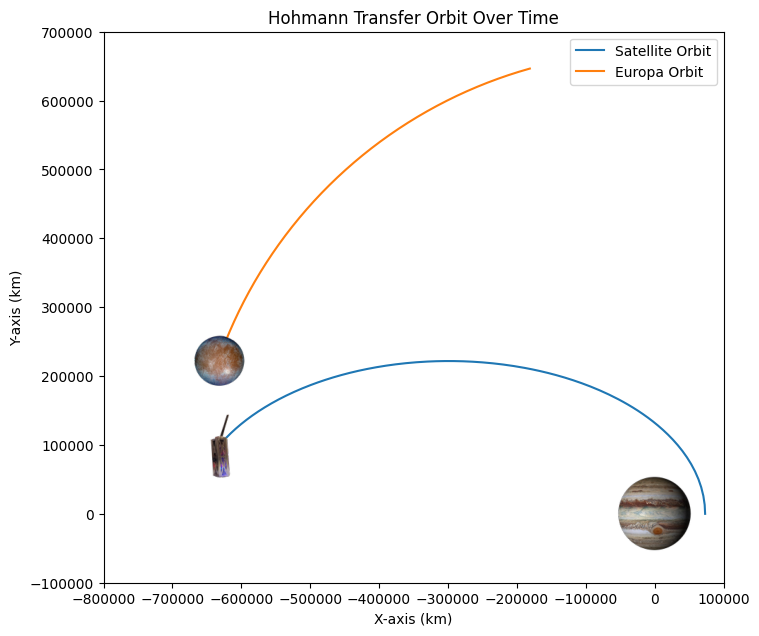

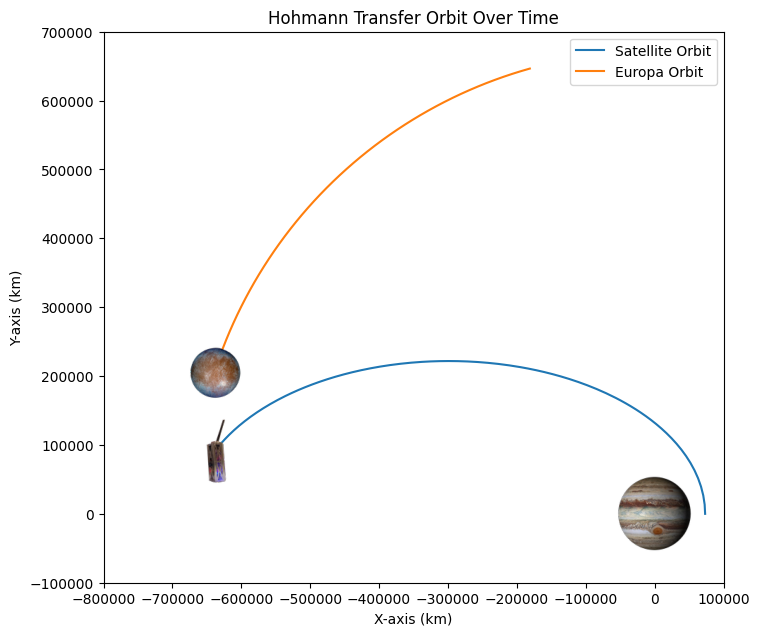

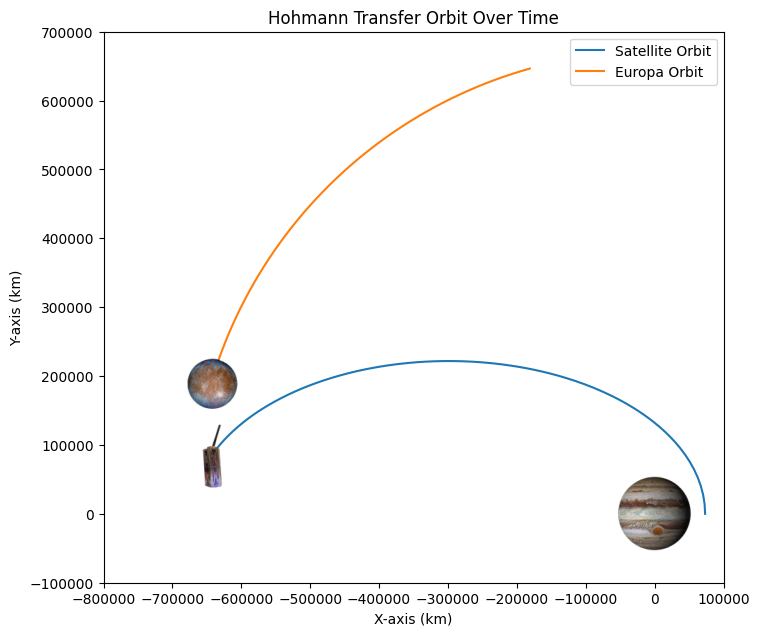

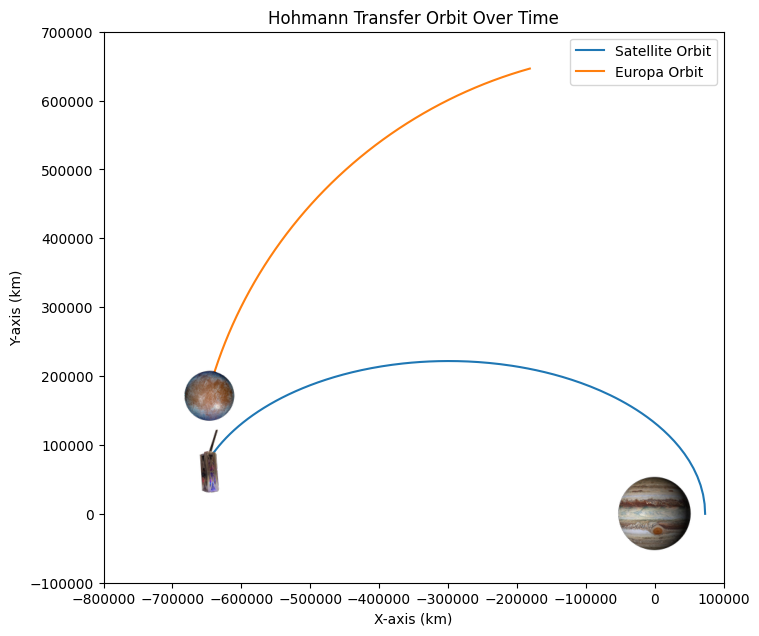

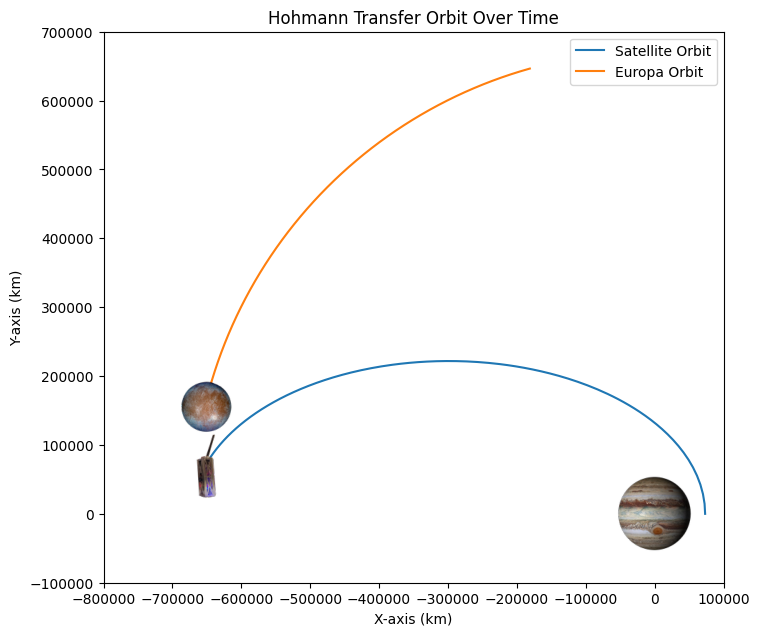

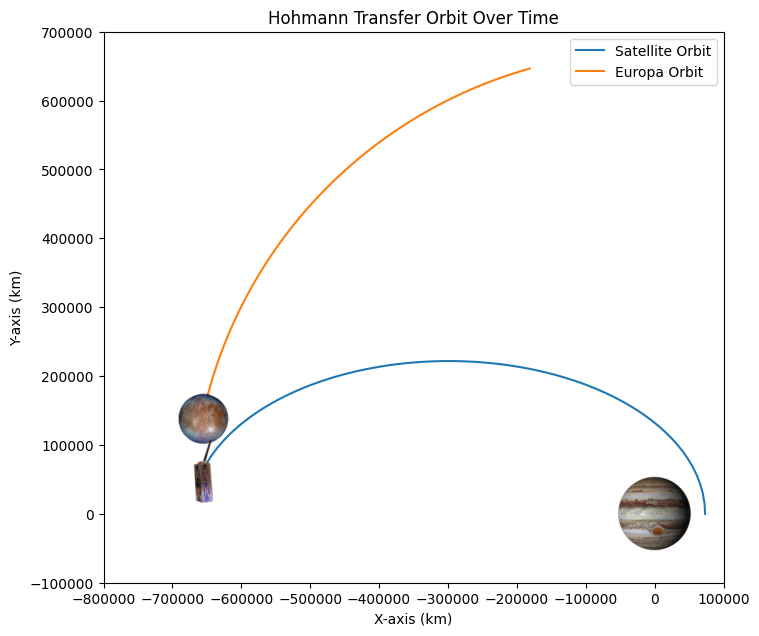

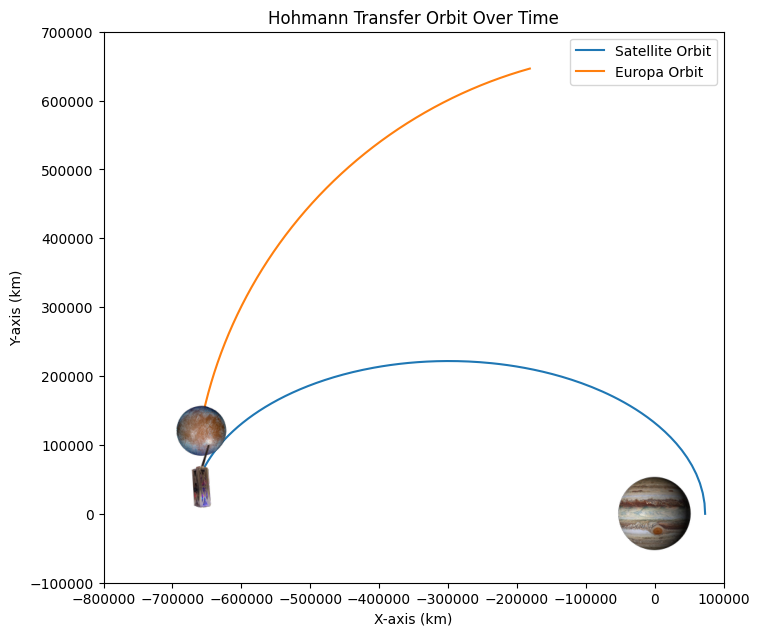

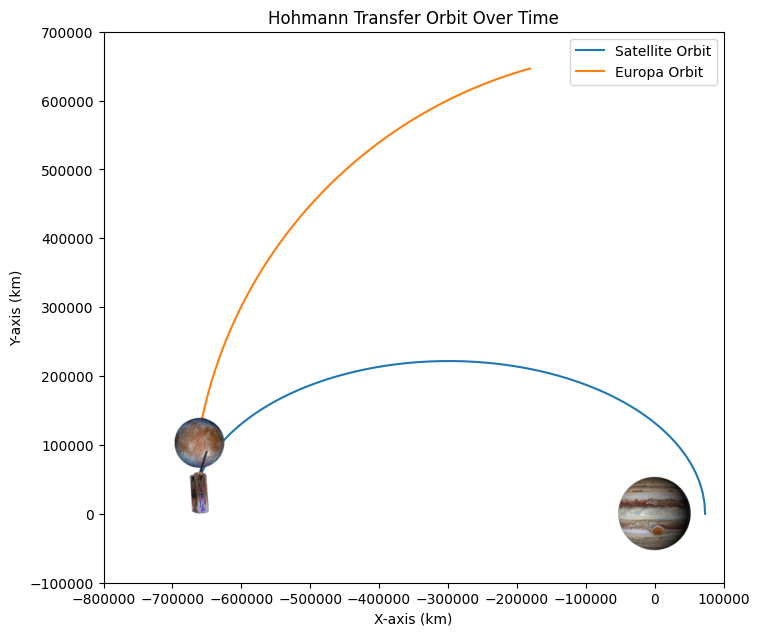

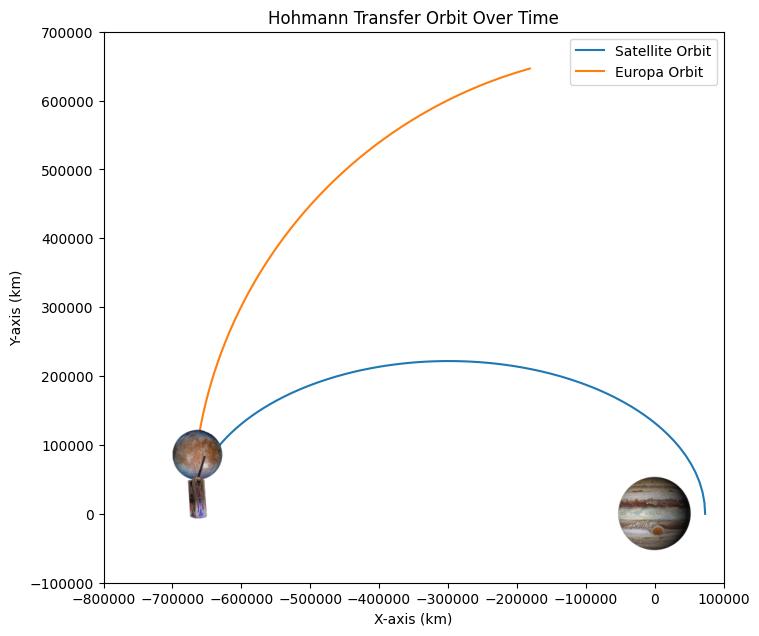

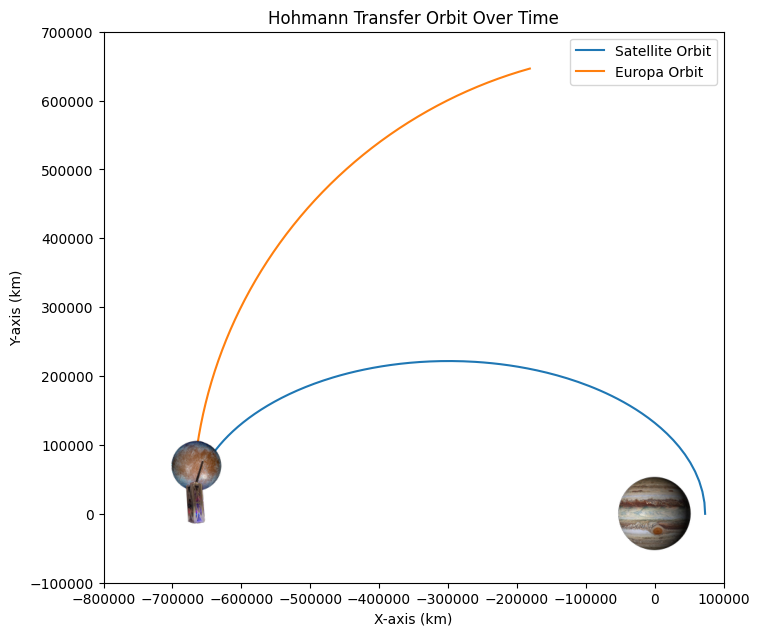

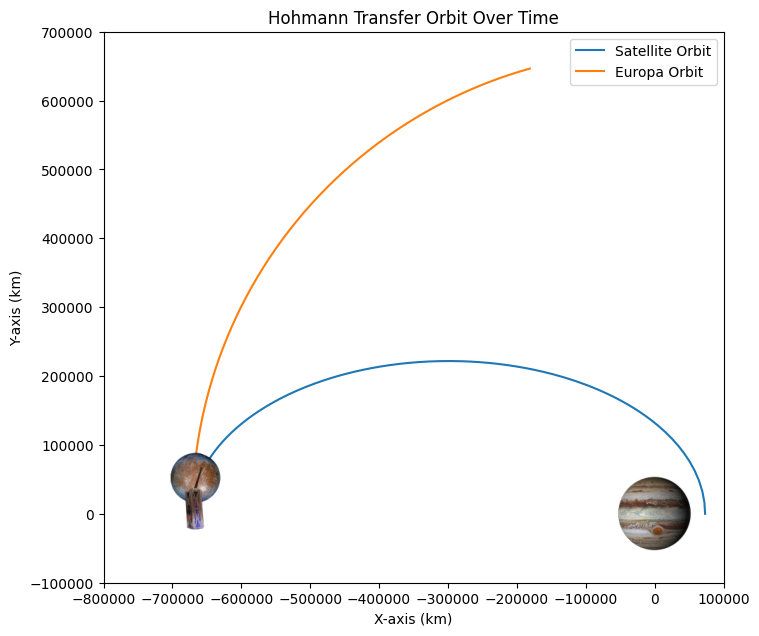

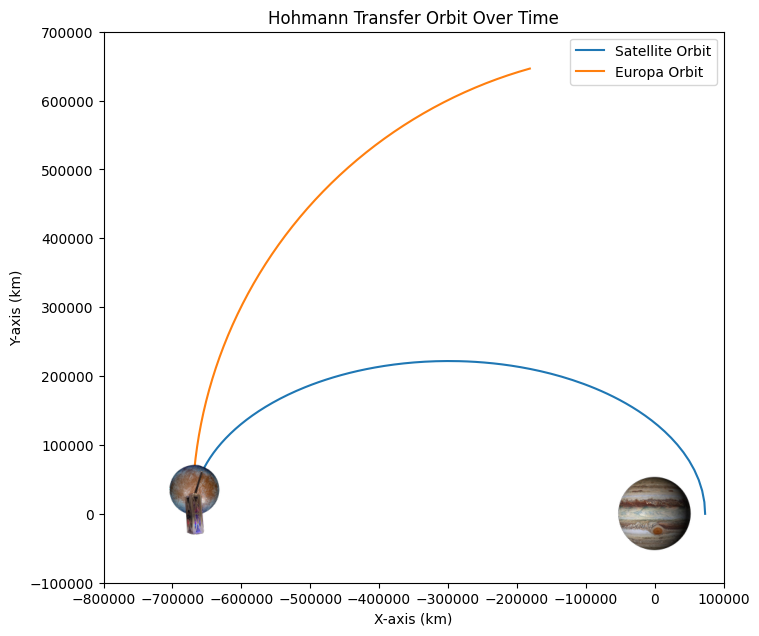

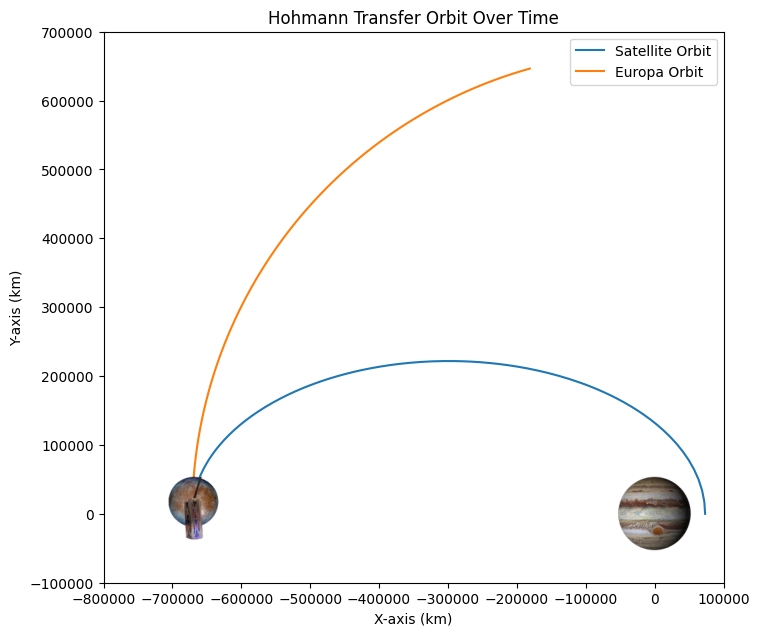

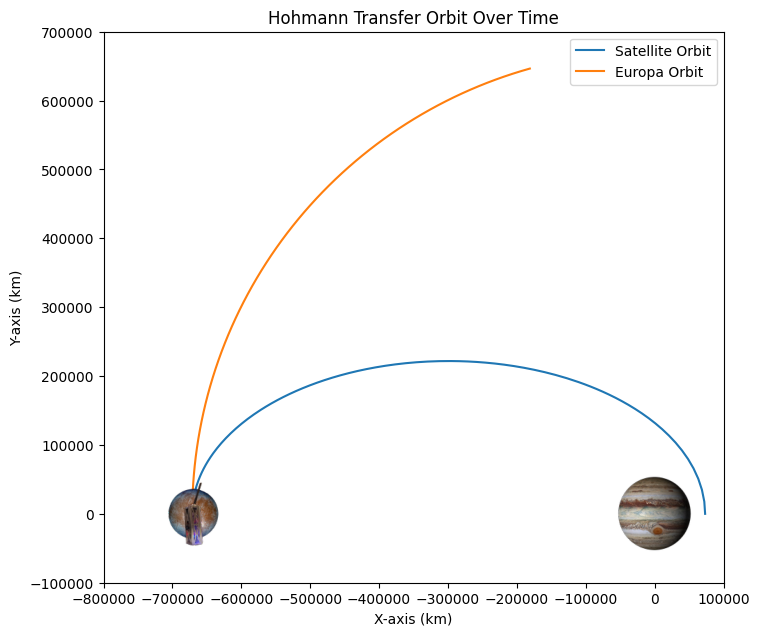

In [166]:
create_animation(time_hohmann,e_hohmann,h_hohmann,h_europa)

[470.81414355 461.39786067 451.9815778  442.56529493 433.14901206
 423.73272919 414.31644632 404.90016345 395.48388058 386.06759771
 376.65131484 367.23503197 357.81874909 348.40246622 338.98618335
 329.56990048 320.15361761 310.73733474 301.32105187 291.904769
 282.48848613 273.07220326 263.65592039 254.23963751 244.82335464
 235.40707177 225.9907889  216.57450603 207.15822316 197.74194029
 188.32565742 178.90937455 169.49309168 160.07680881 150.66052593
 141.24424306 131.82796019 122.41167732 112.99539445 103.57911158
  94.16282871  84.74654584  75.33026297  65.9139801   56.49769723
  47.08141435  37.66513148  28.24884861  18.83256574   9.41628287
   0.        ]


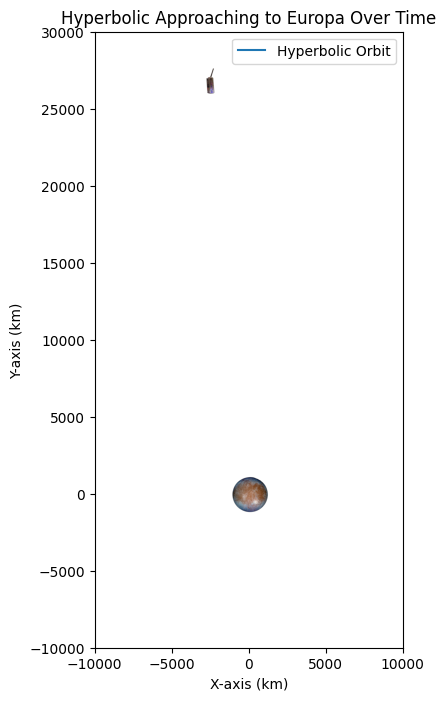

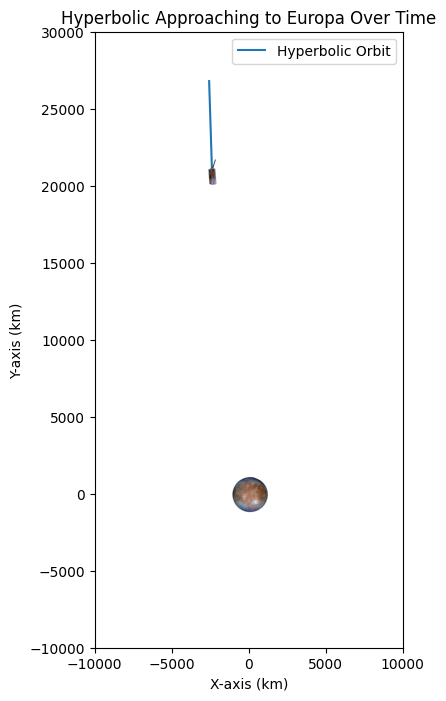

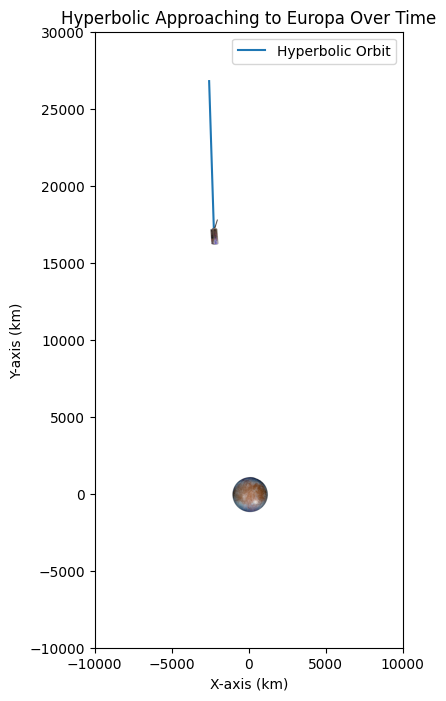

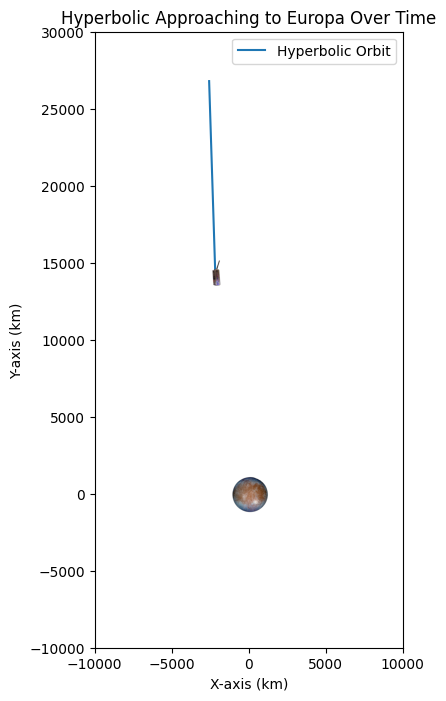

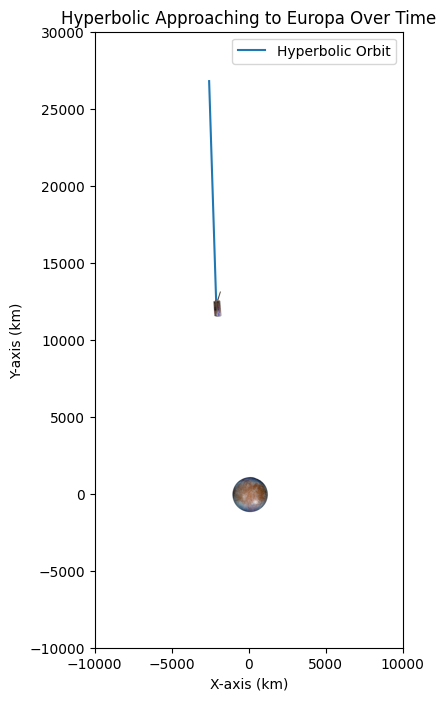

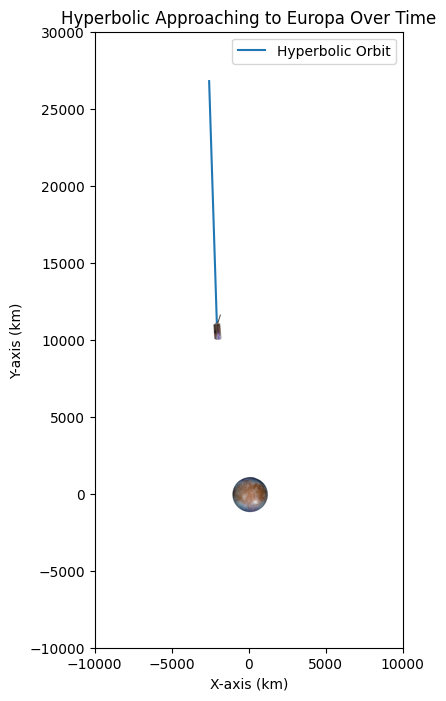

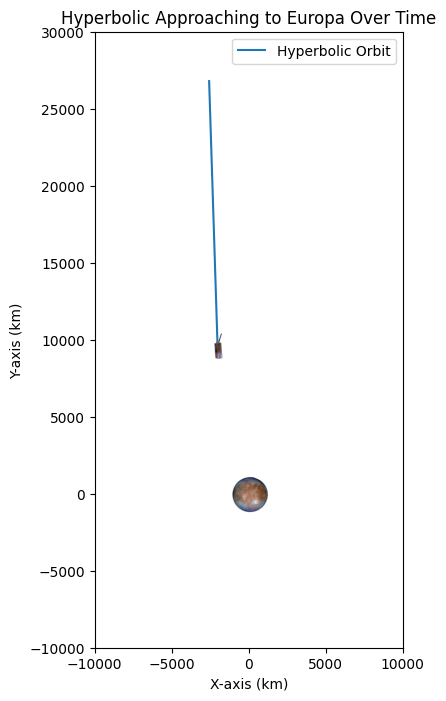

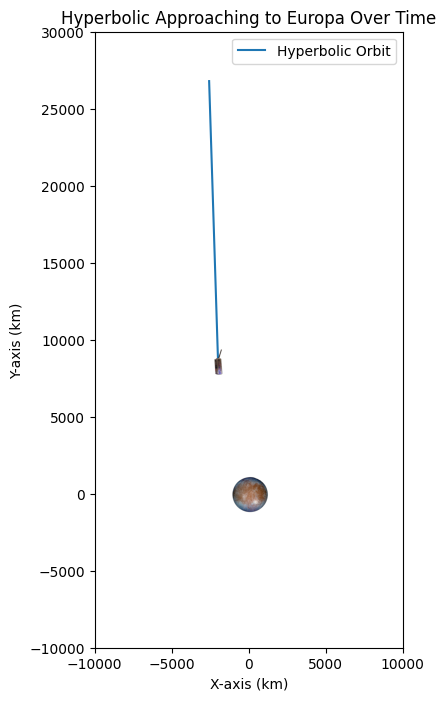

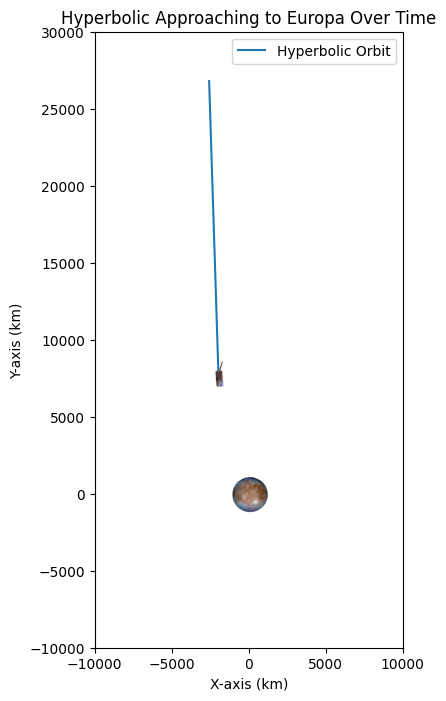

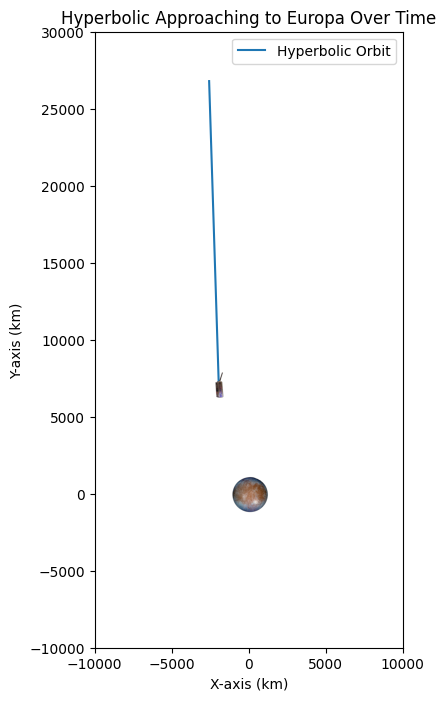

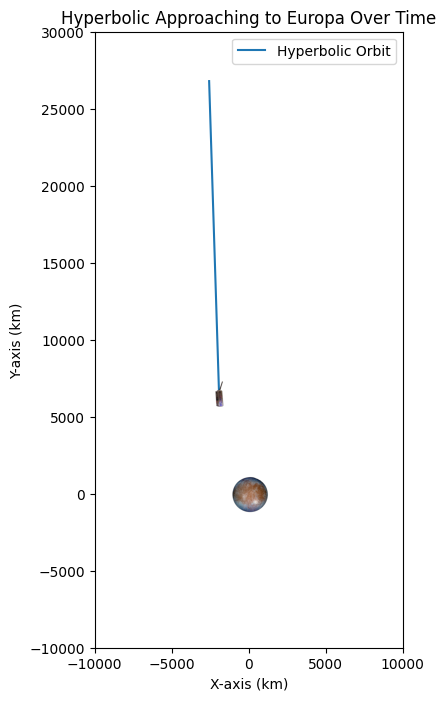

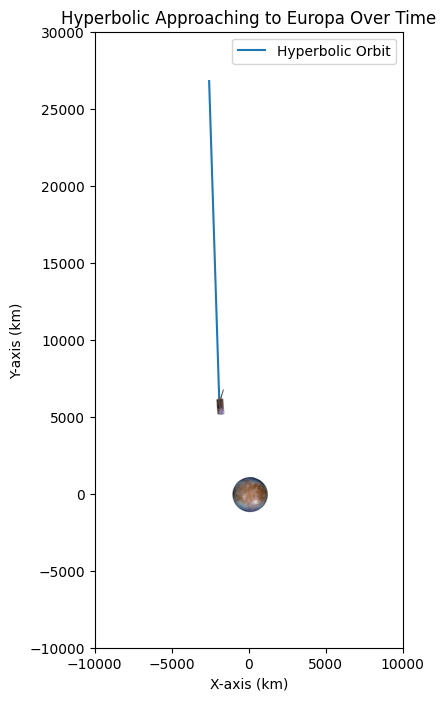

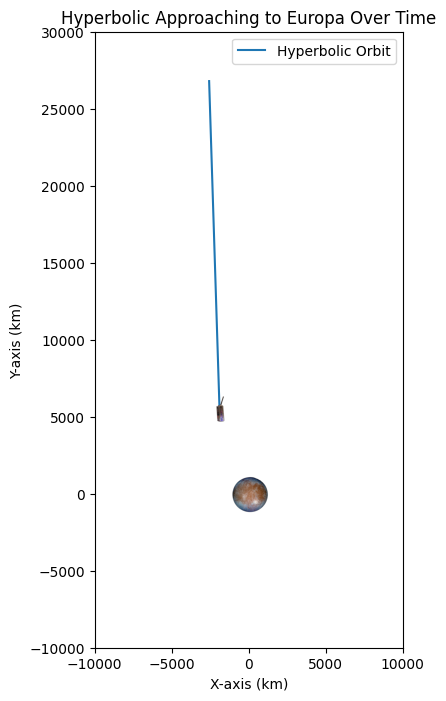

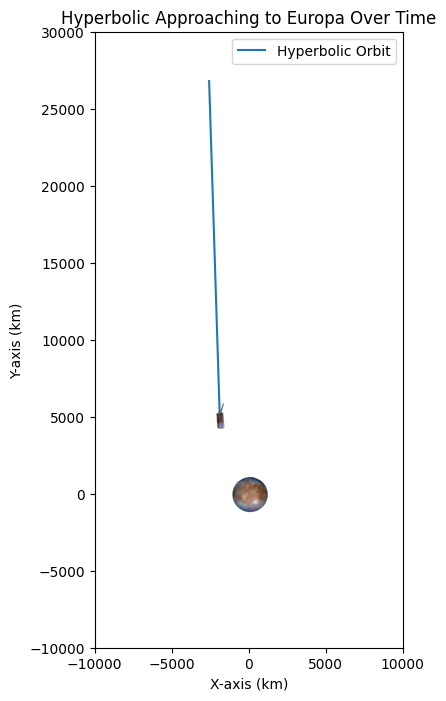

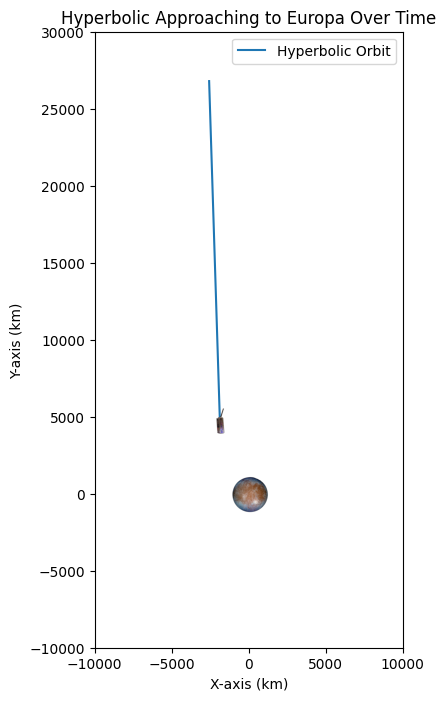

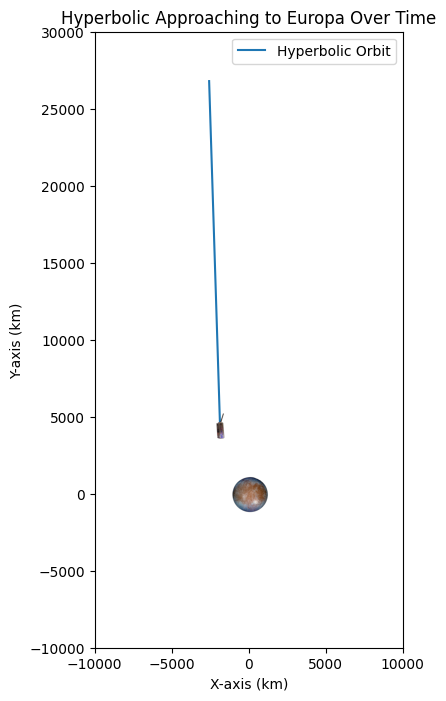

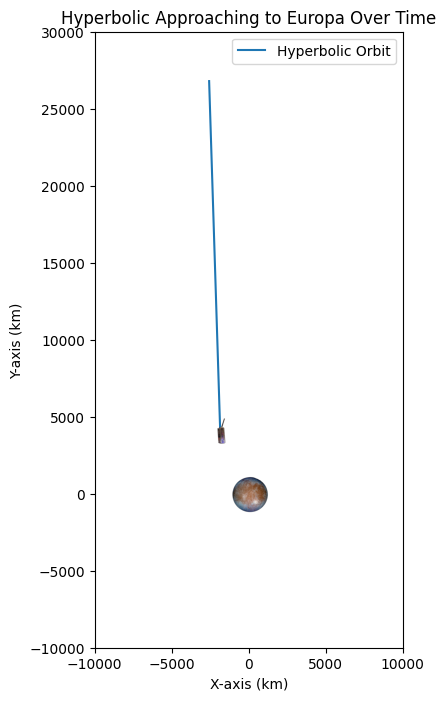

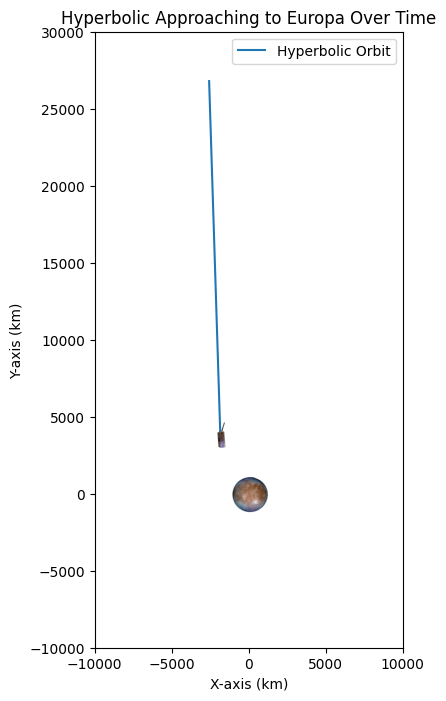

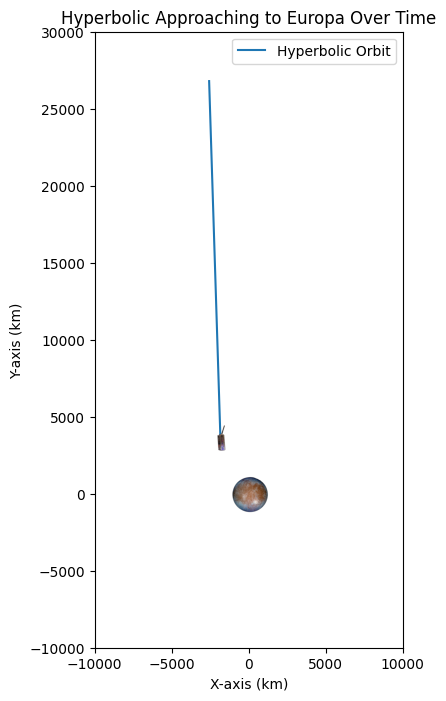

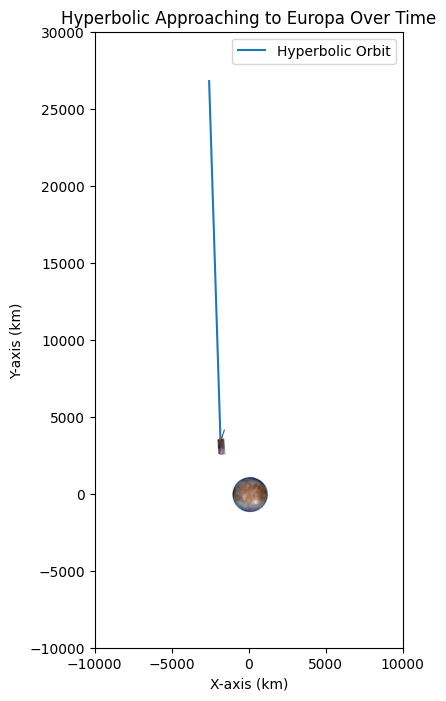

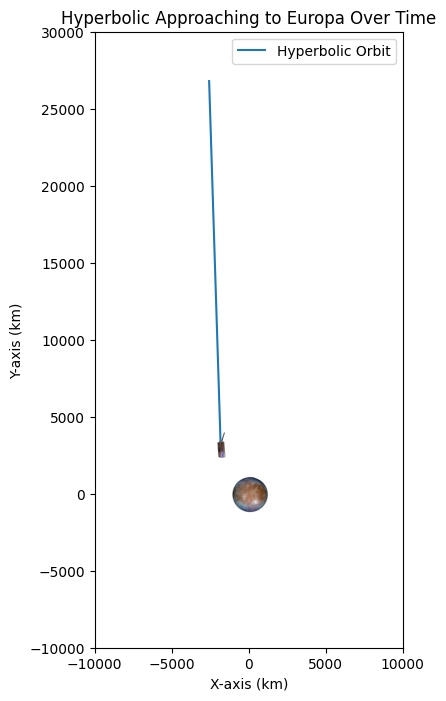

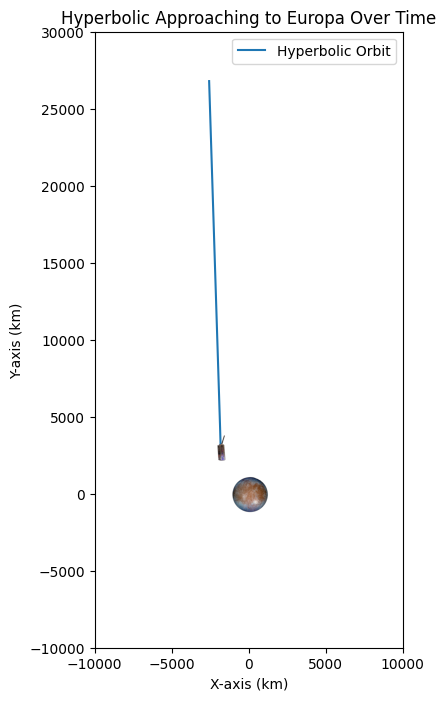

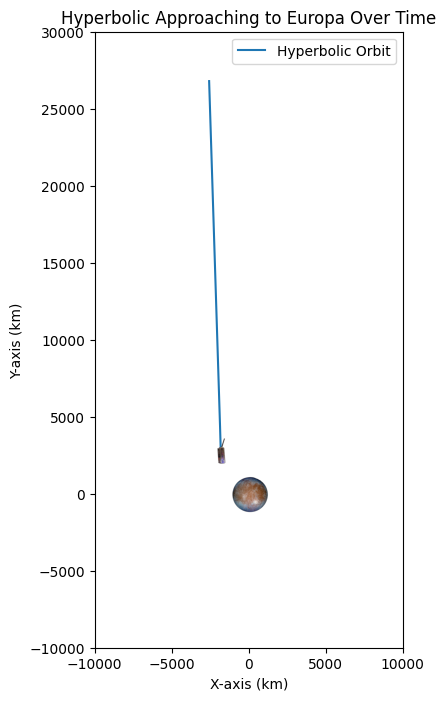

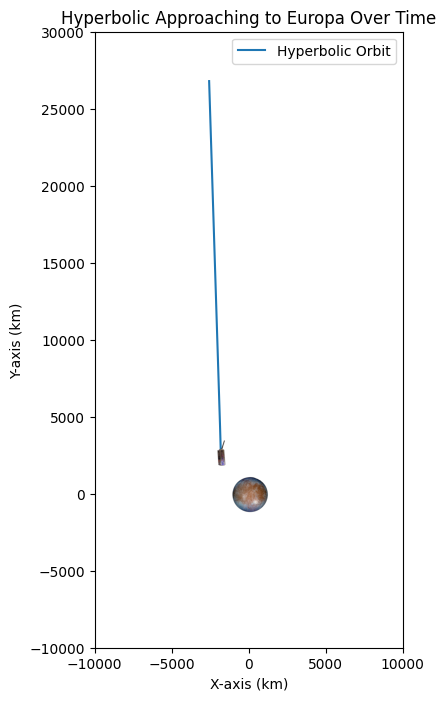

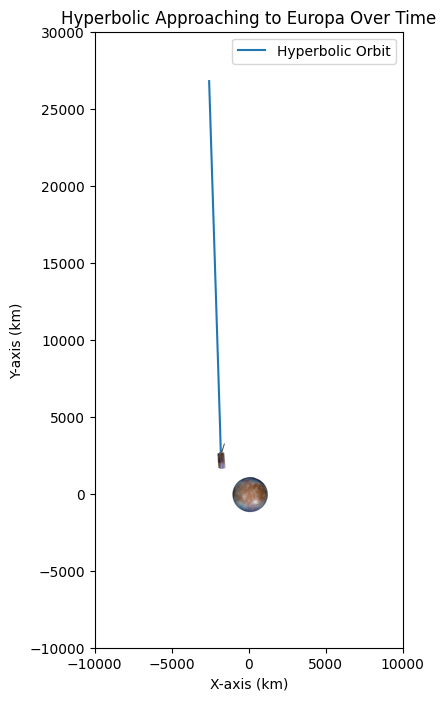

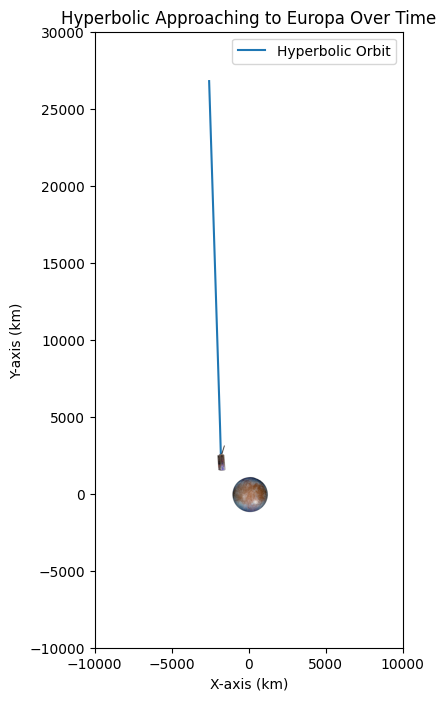

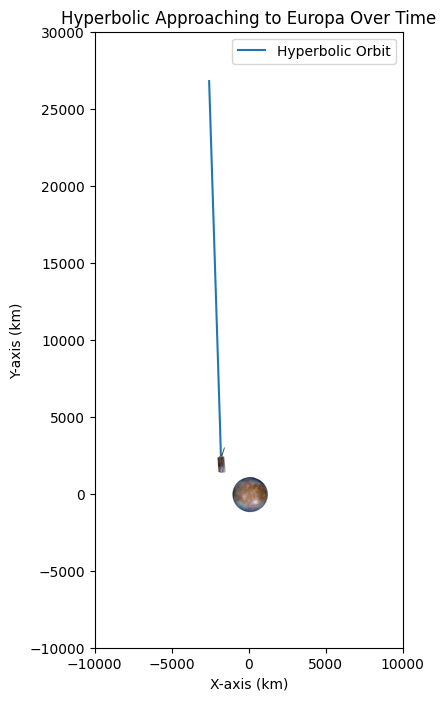

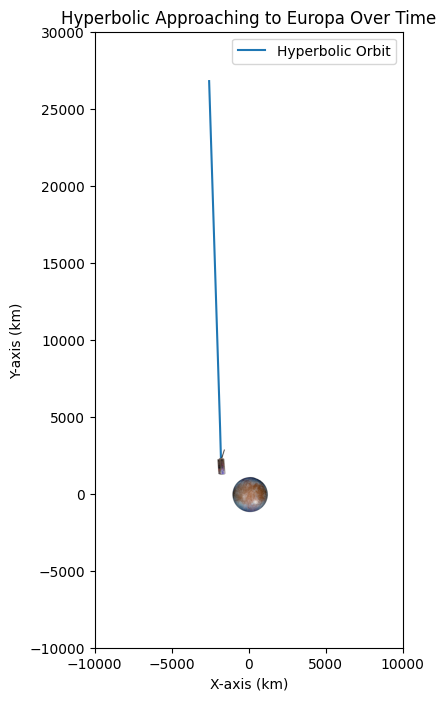

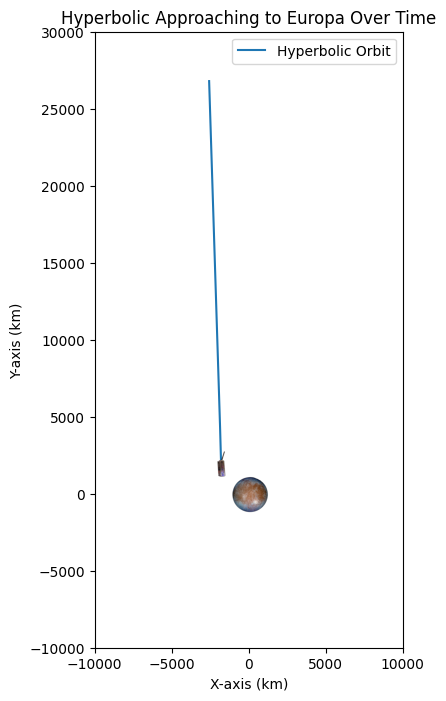

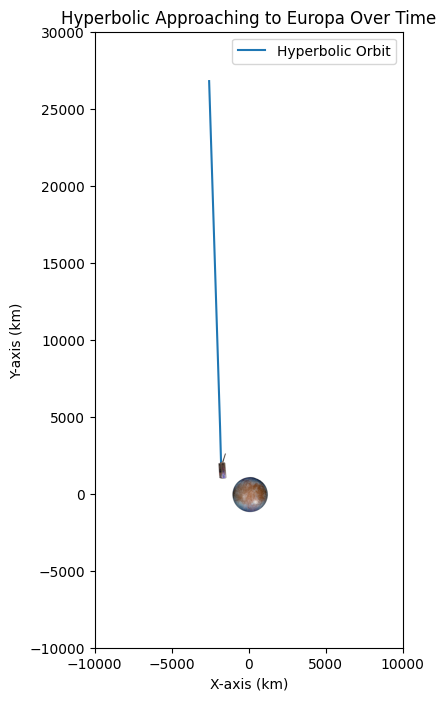

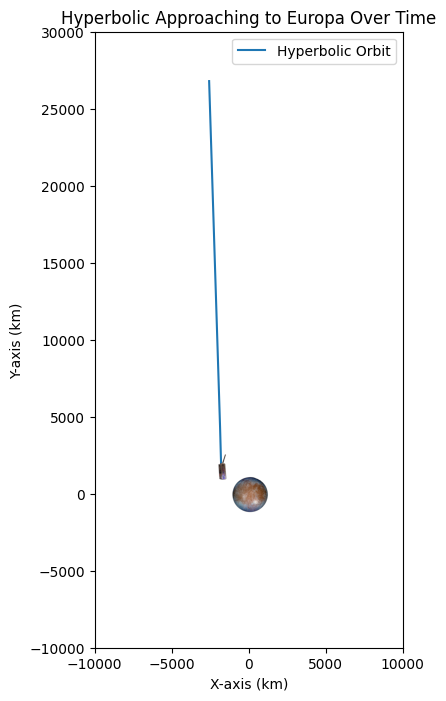

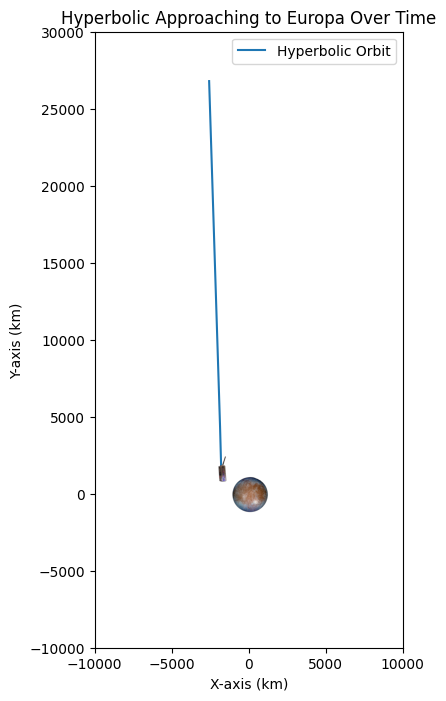

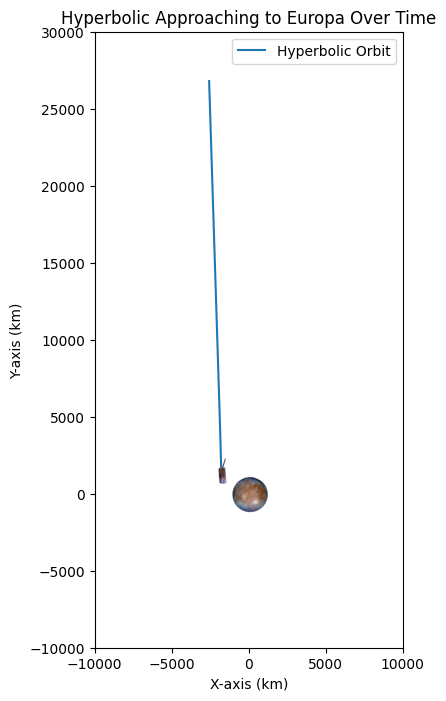

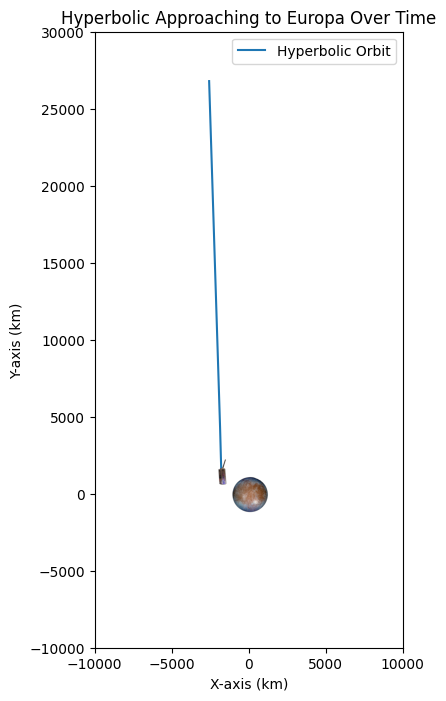

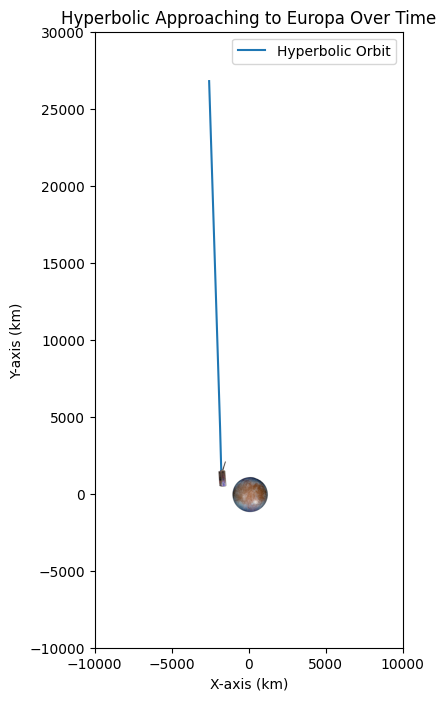

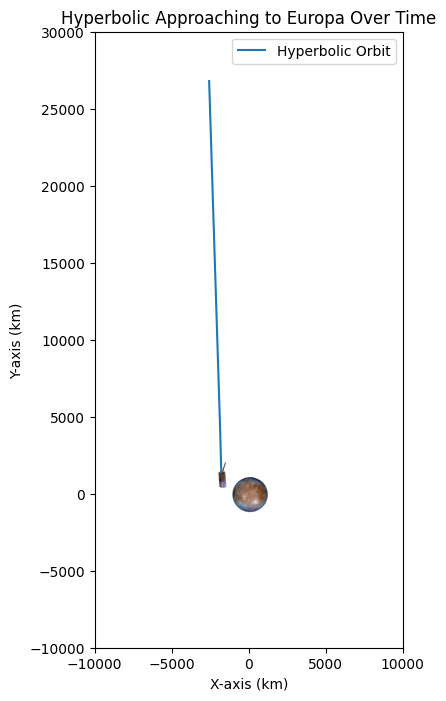

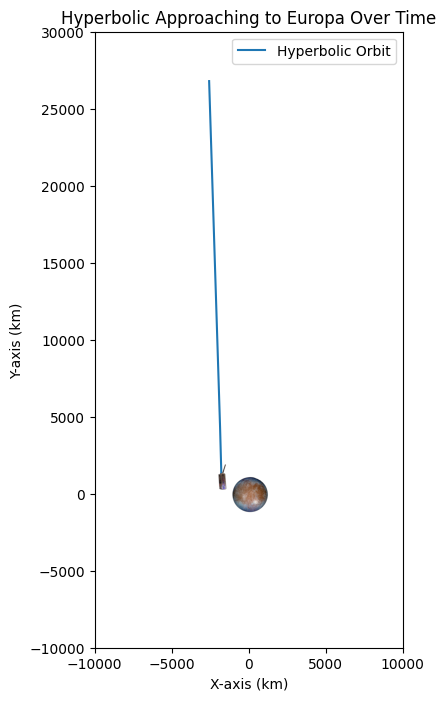

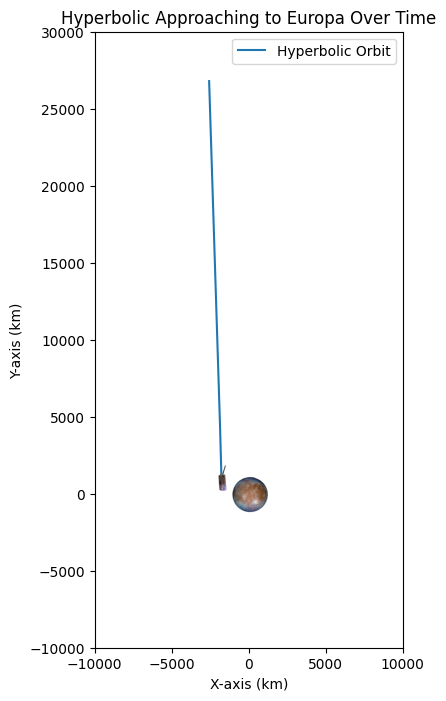

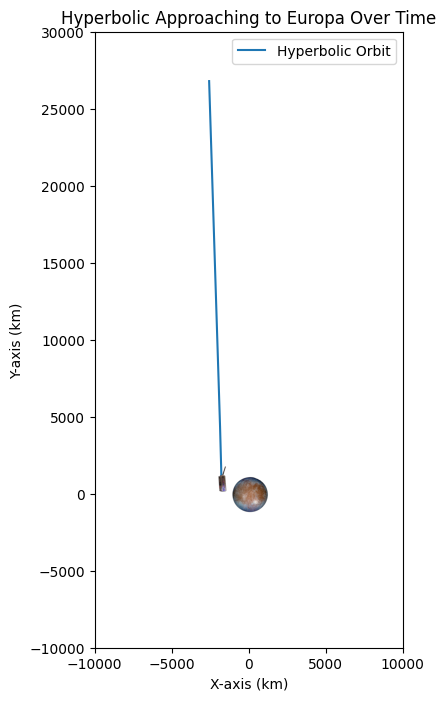

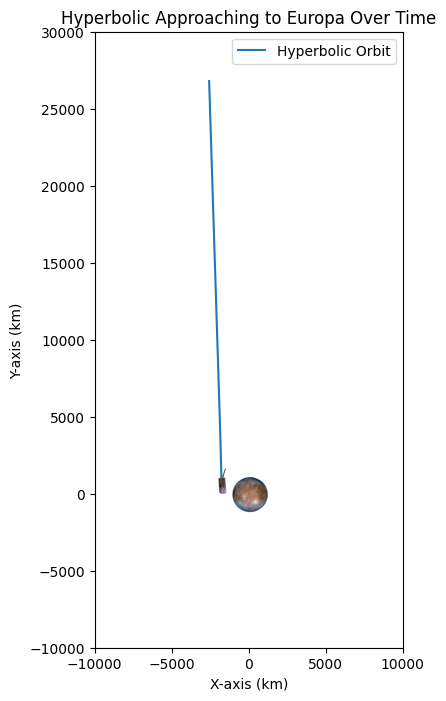

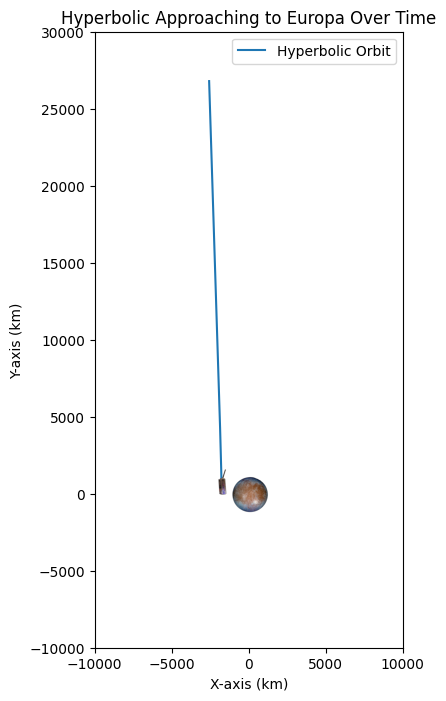

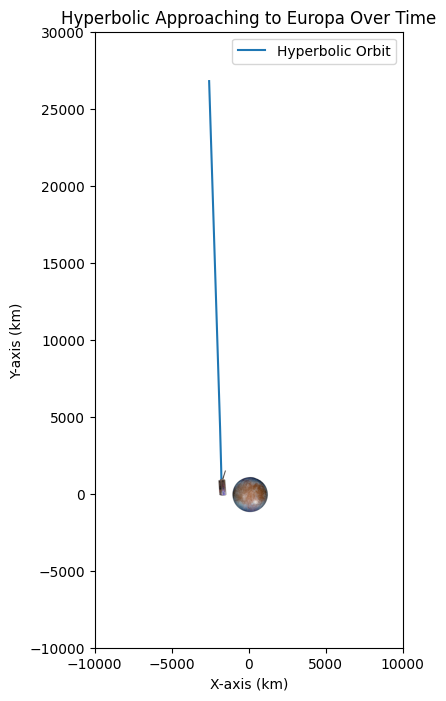

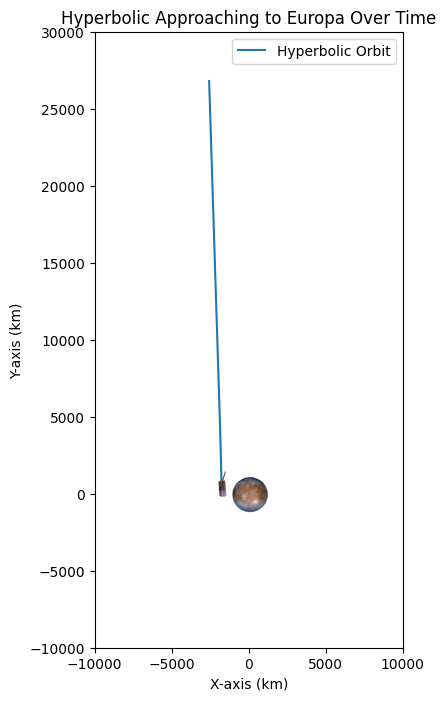

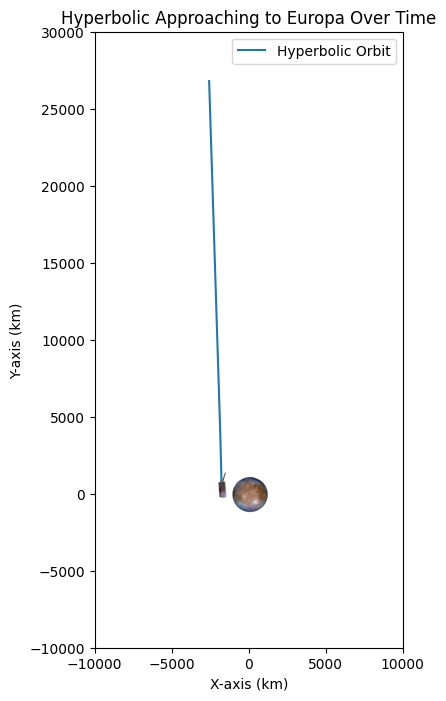

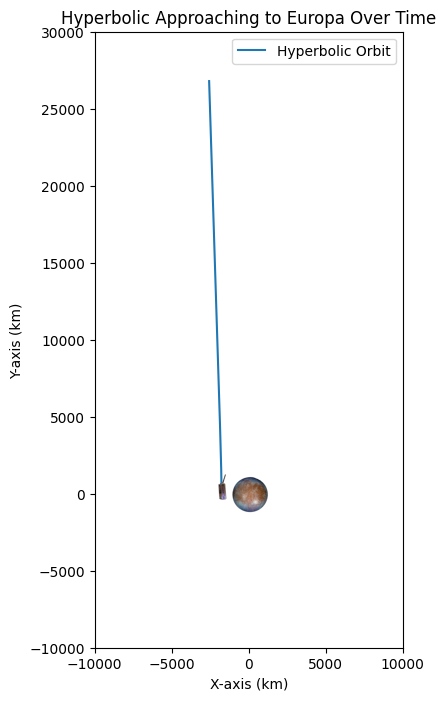

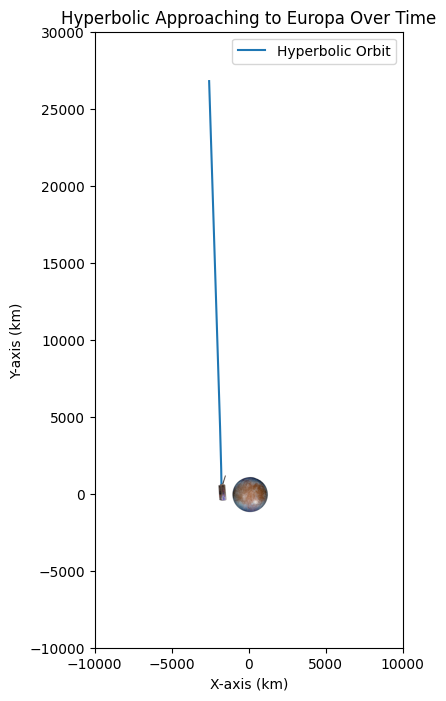

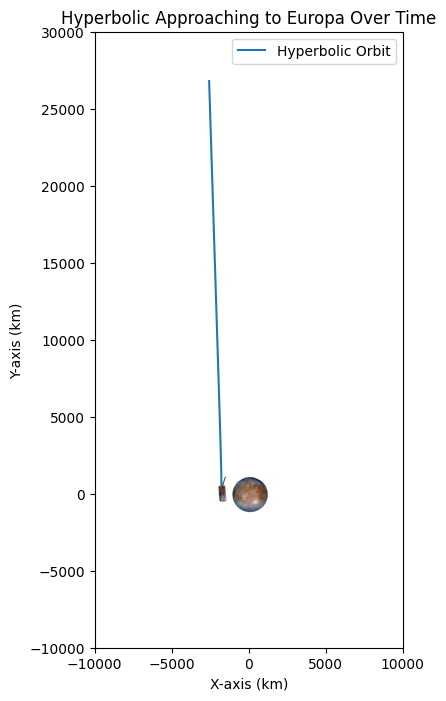

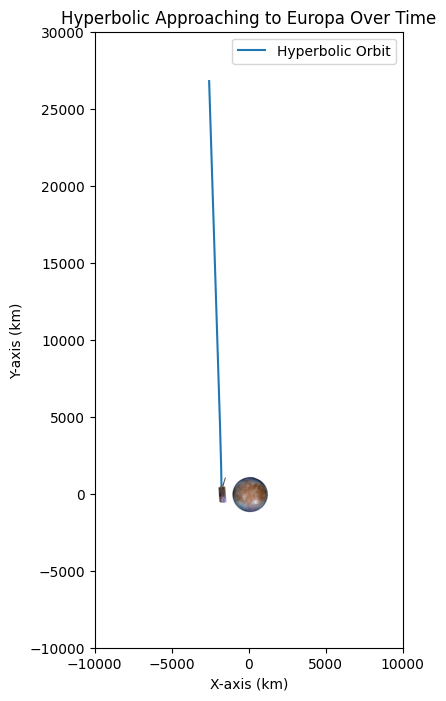

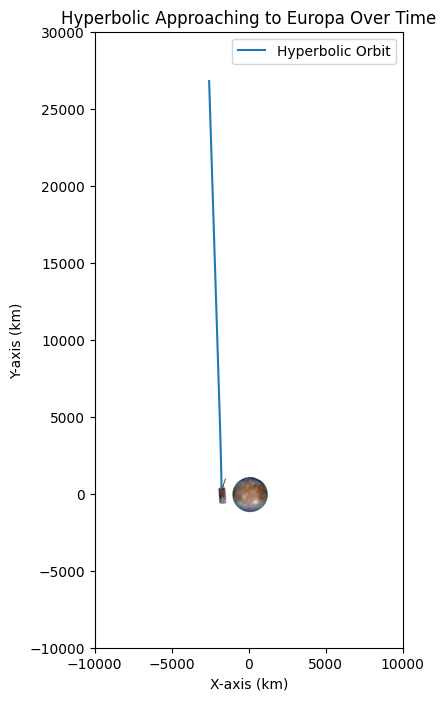

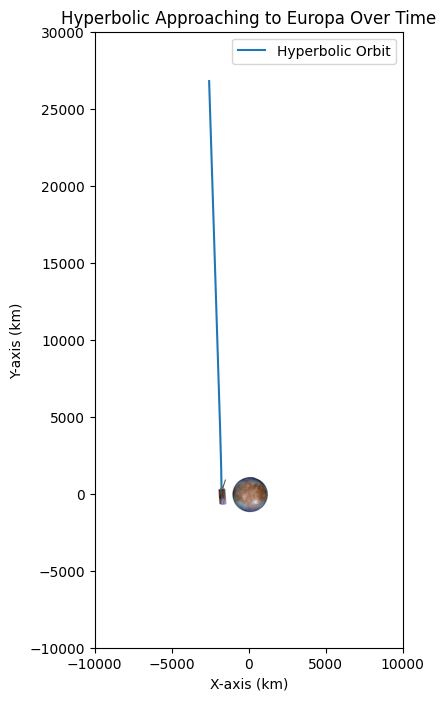

C:\Users\enes\AppData\Local\Temp\ipykernel_3852\4228558699.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  true_anomaly_satellite = [2 * np.arctan(np.sqrt((e_hyper + 1) / (e_hyper - 1)) * (1 / np.tan(i / 2))) for i in F]


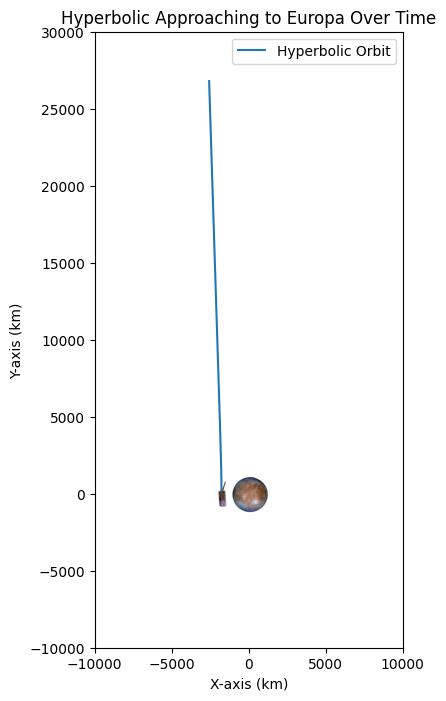

In [167]:
create_animation_hyper(t_hyper,e_hyper,h_hyper)

[   0.  180.  360.  540.  720.  900. 1080. 1260. 1440. 1620. 1800. 1980.
 2160. 2340. 2520. 2700. 2880. 3060. 3240. 3420. 3600. 3780. 3960. 4140.
 4320. 4500. 4680. 4860. 5040. 5220. 5400. 5580. 5760. 5940. 6120. 6300.
 6480. 6660. 6840. 7020. 7200. 7380. 7560. 7740. 7920. 8100. 8280. 8460.
 8640. 8820. 9000.]


C:\Users\enes\AppData\Local\Temp\ipykernel_3852\2508672057.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  true_anomaly_satellite = [2 * np.arctan(np.sqrt((e_hyper + 1) / (e_hyper - 1)) * (1 / np.tan(i / 2))) for i in F]


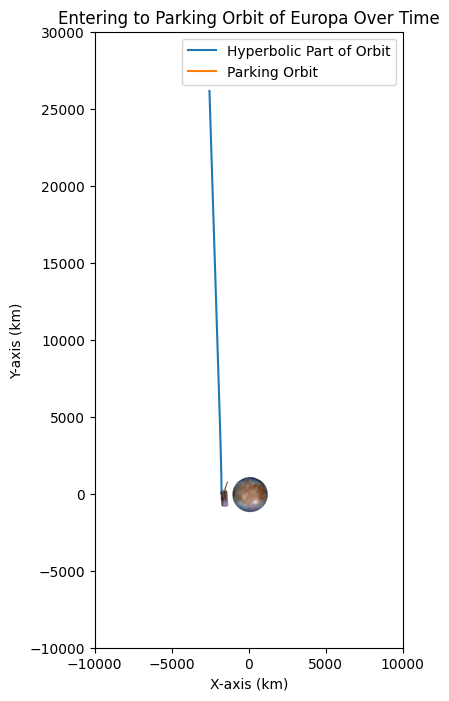

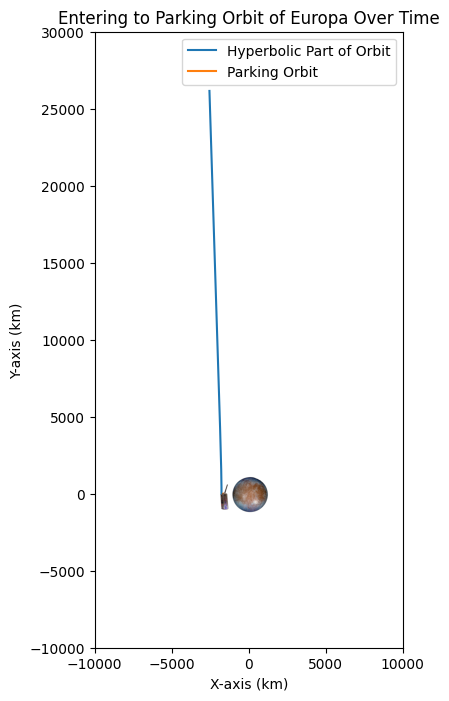

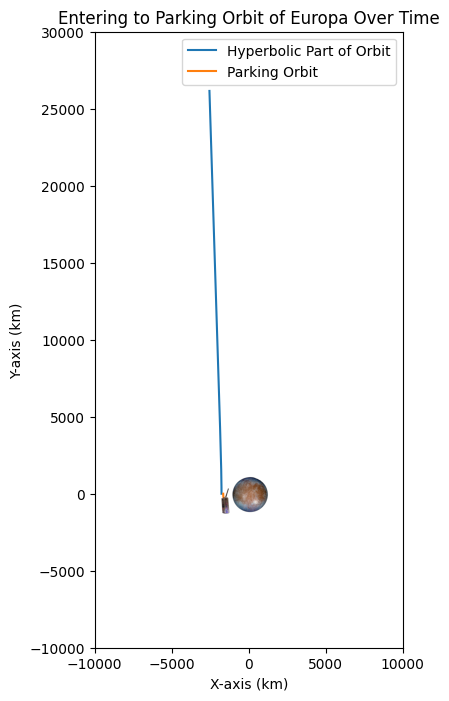

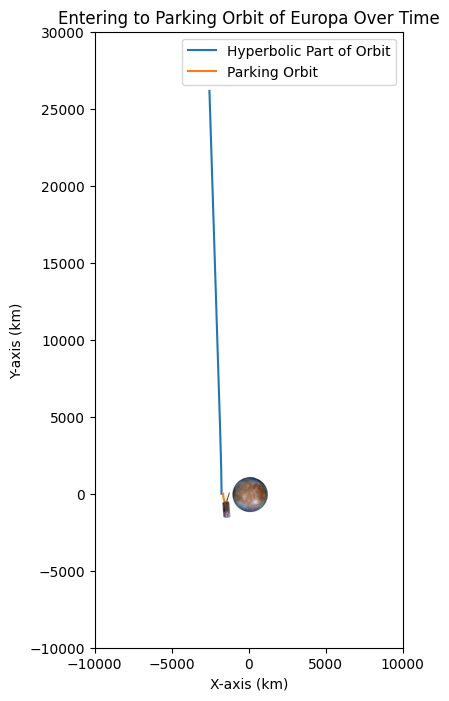

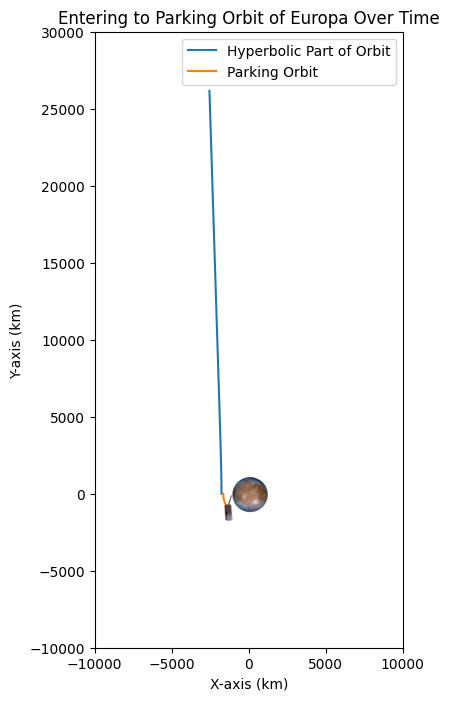

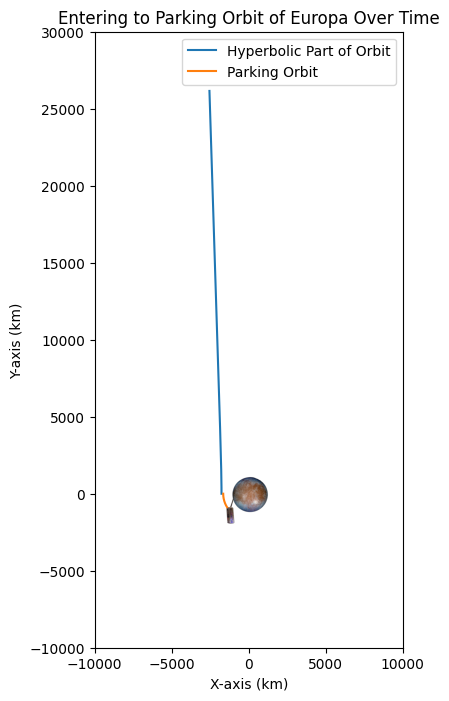

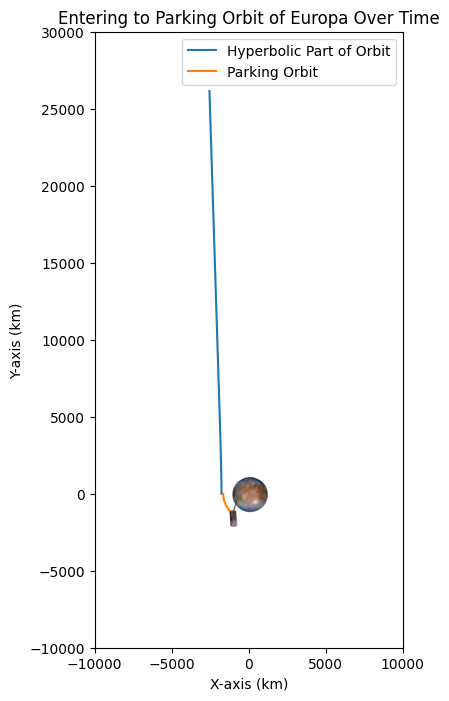

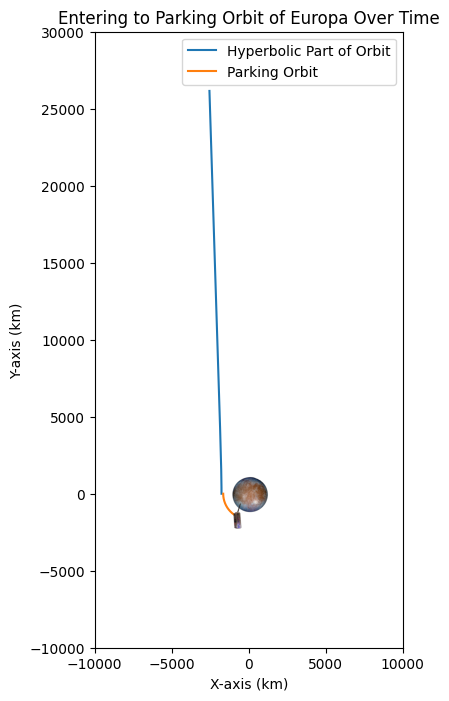

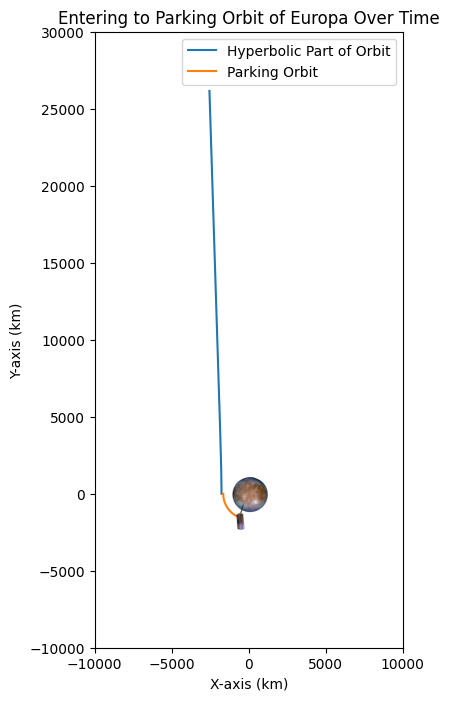

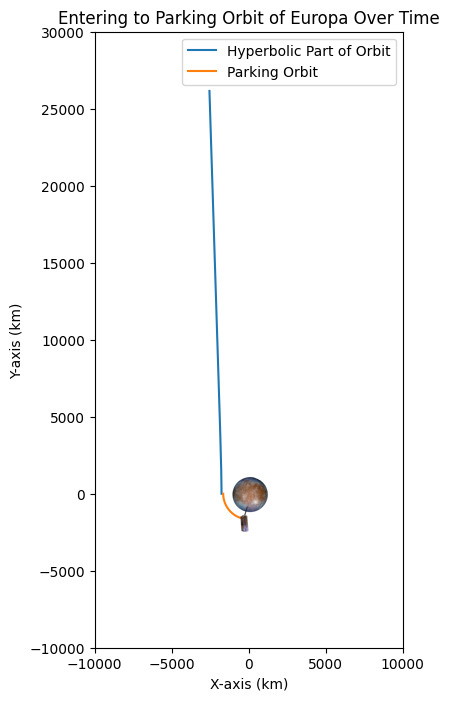

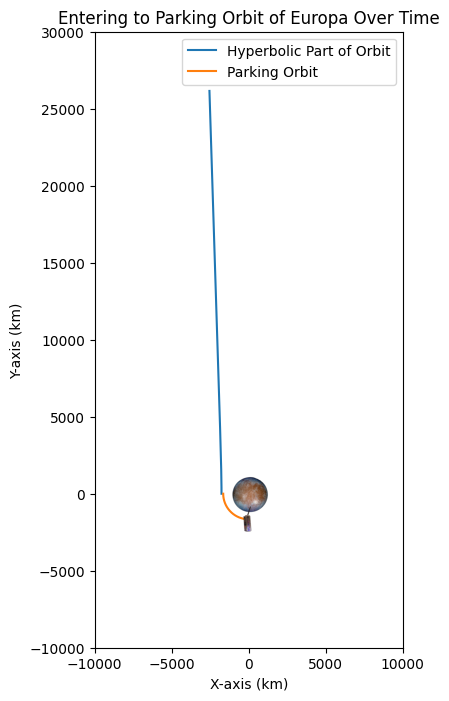

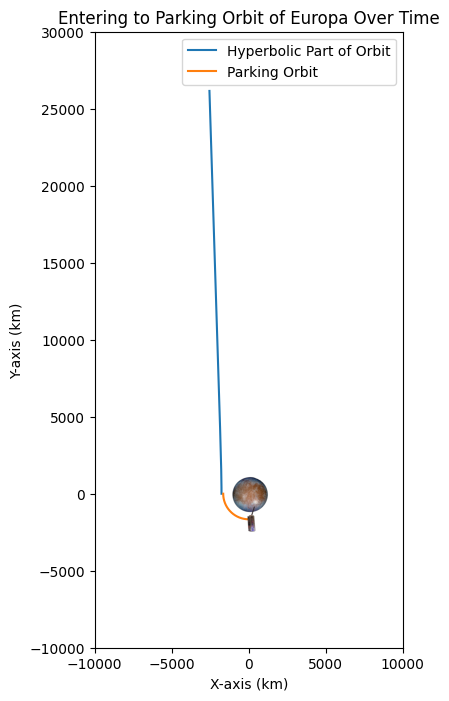

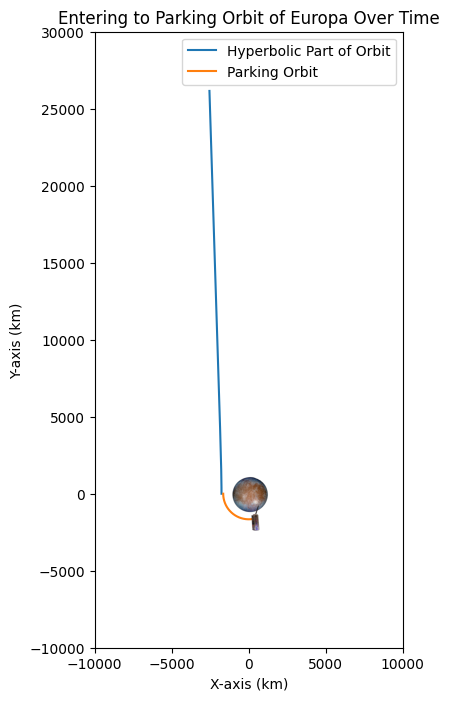

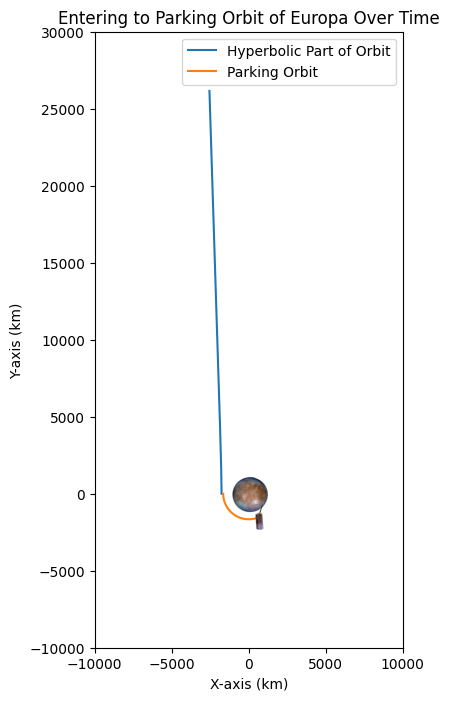

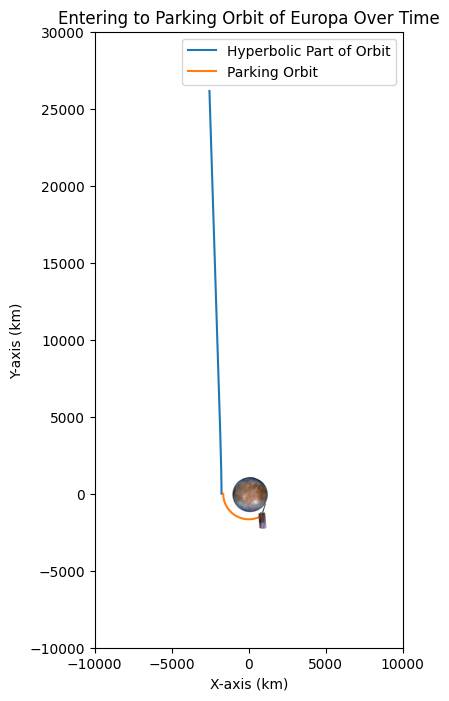

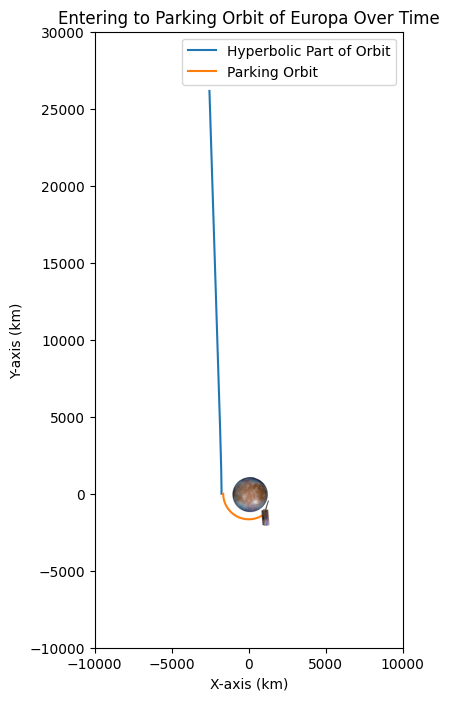

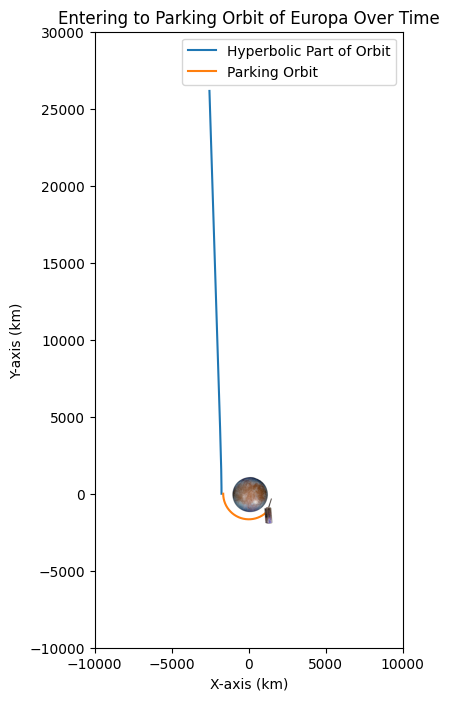

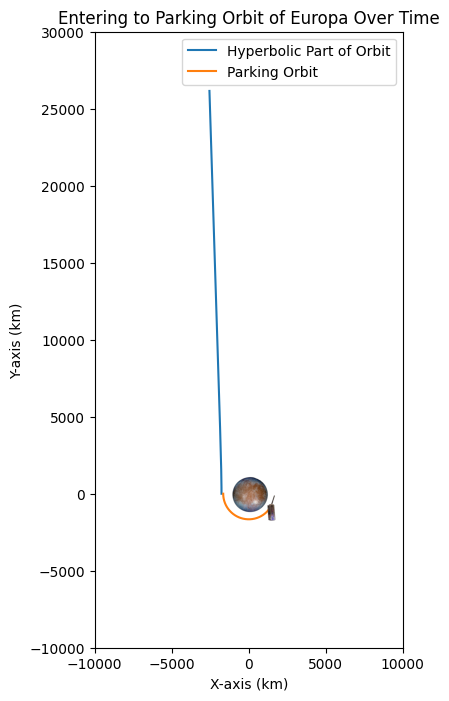

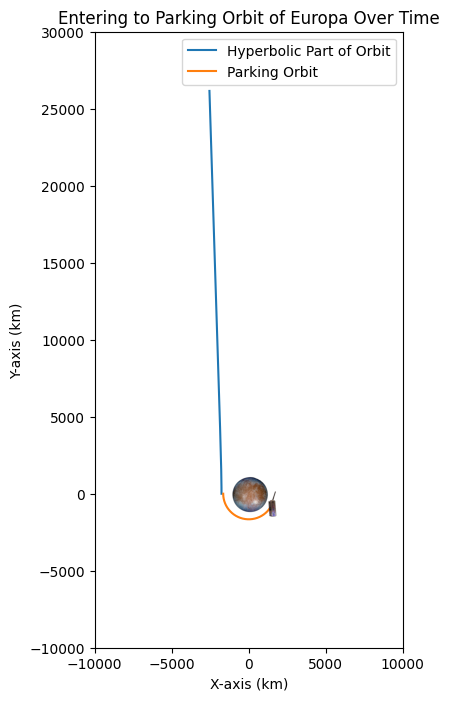

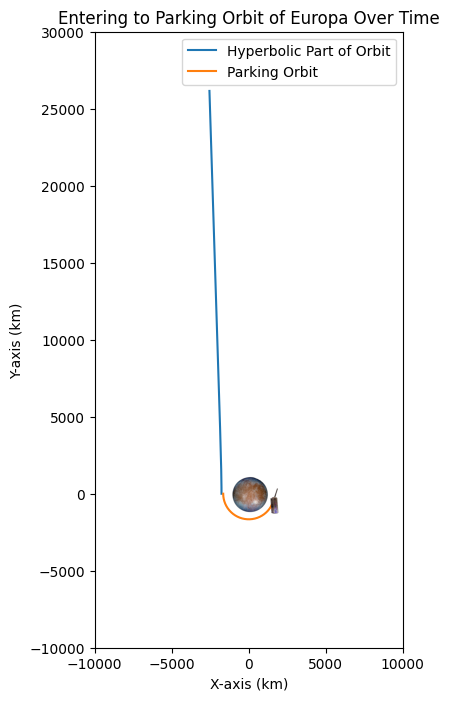

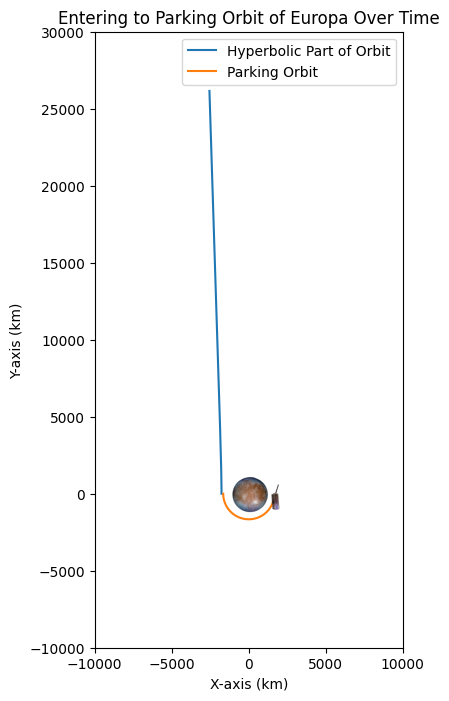

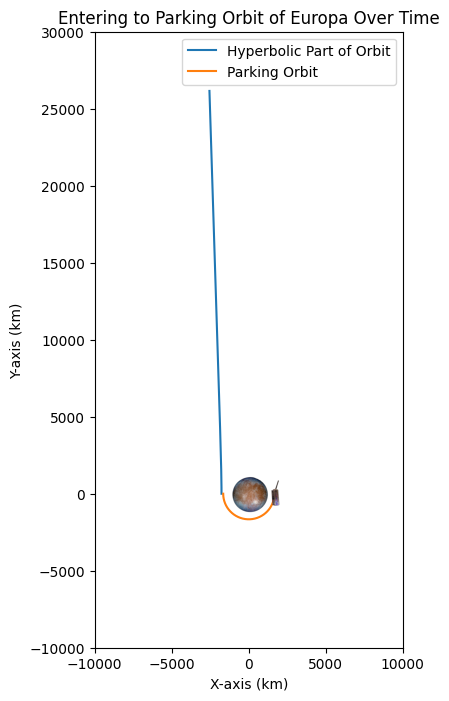

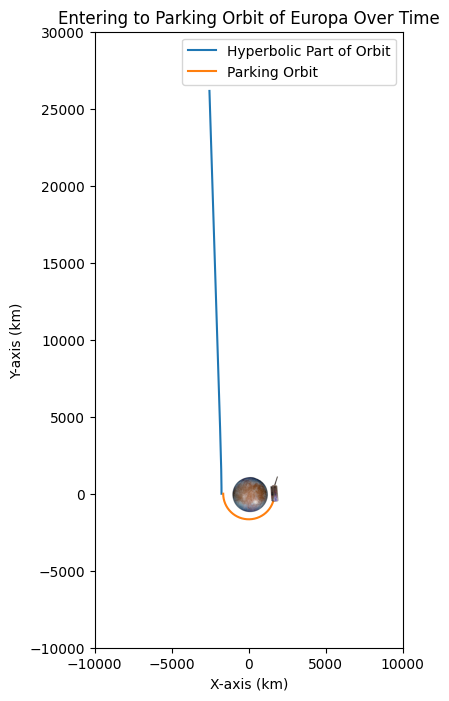

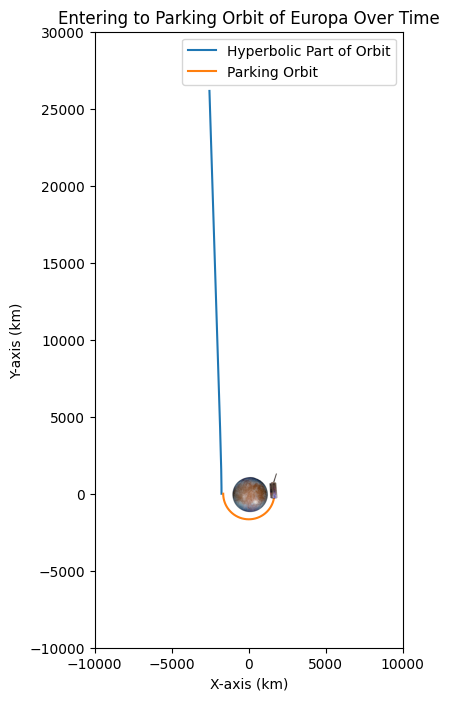

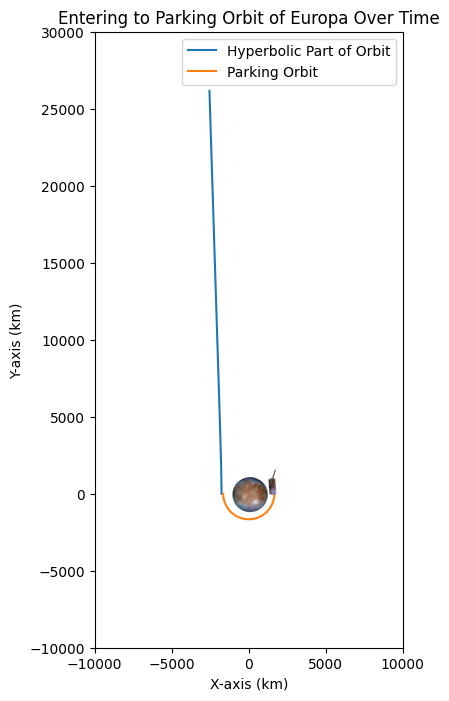

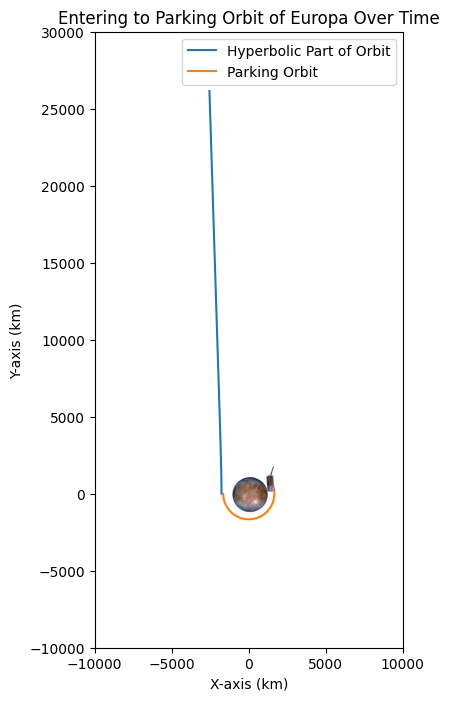

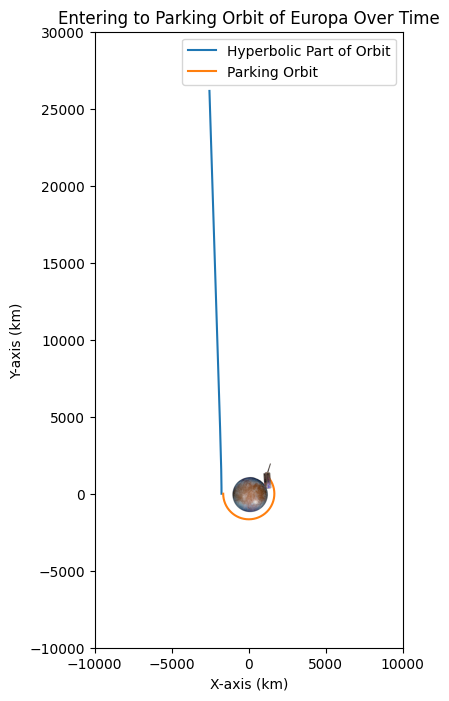

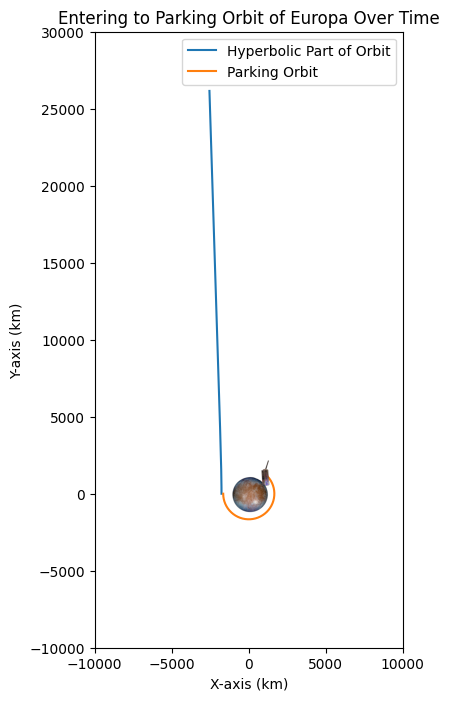

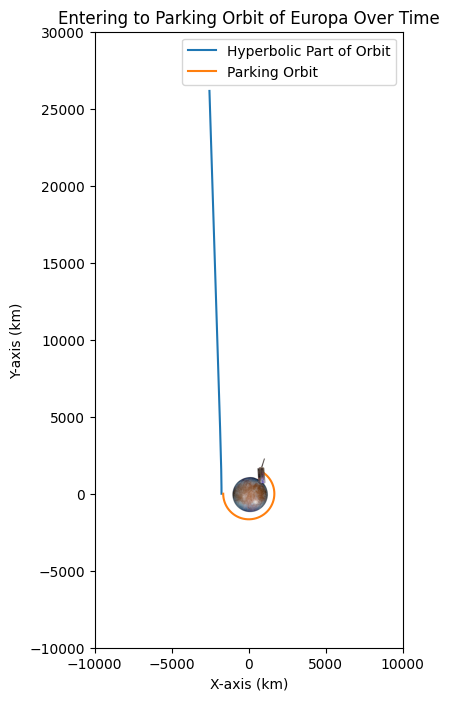

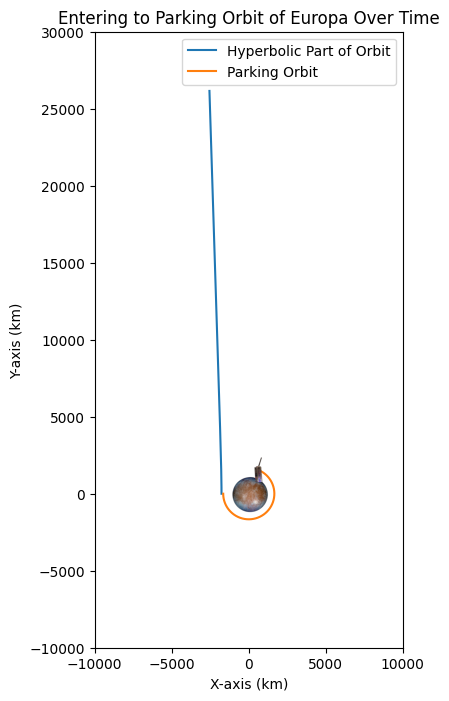

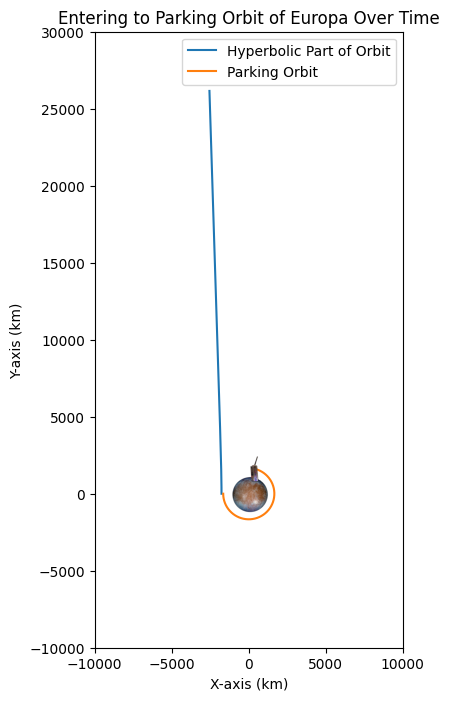

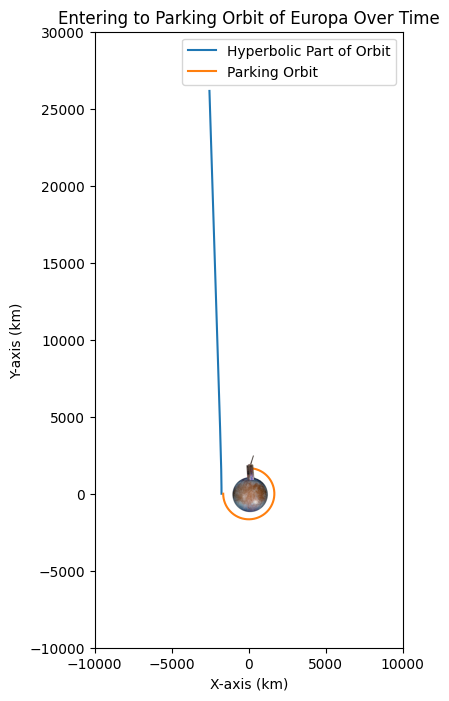

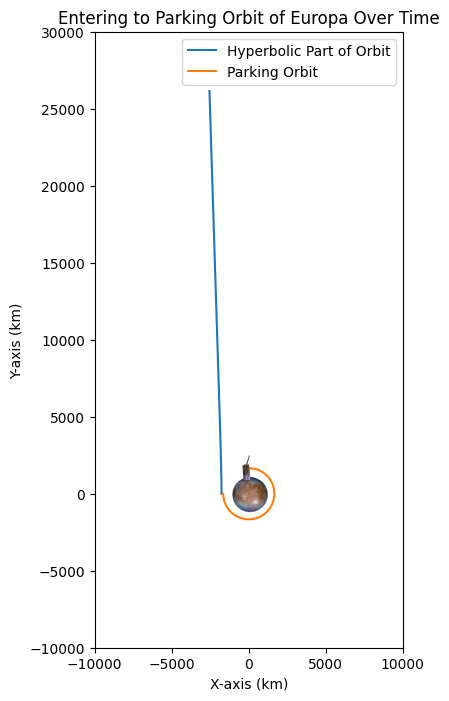

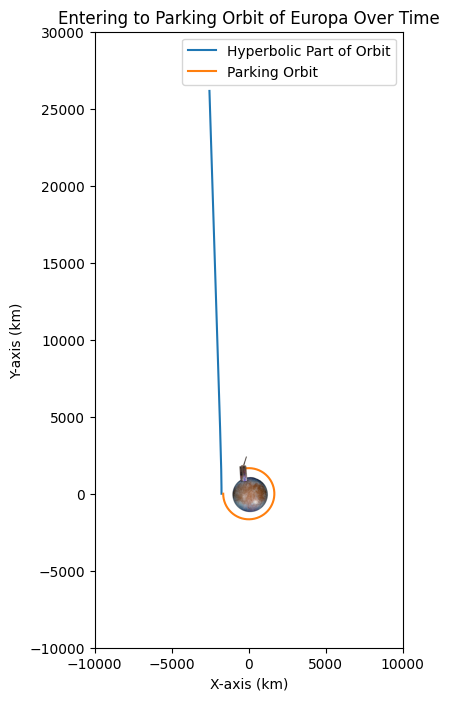

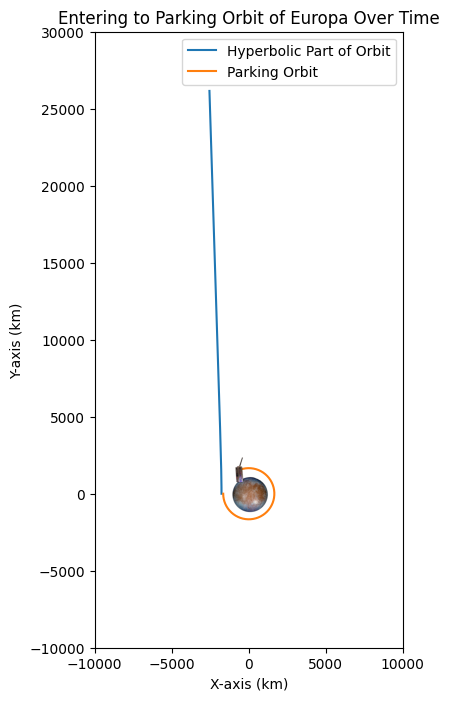

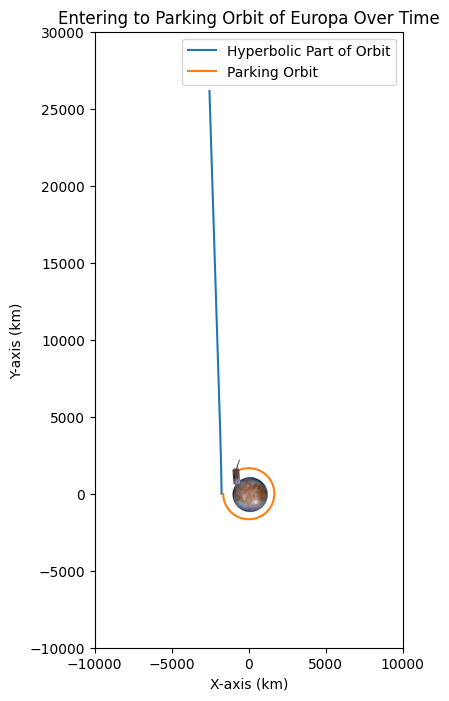

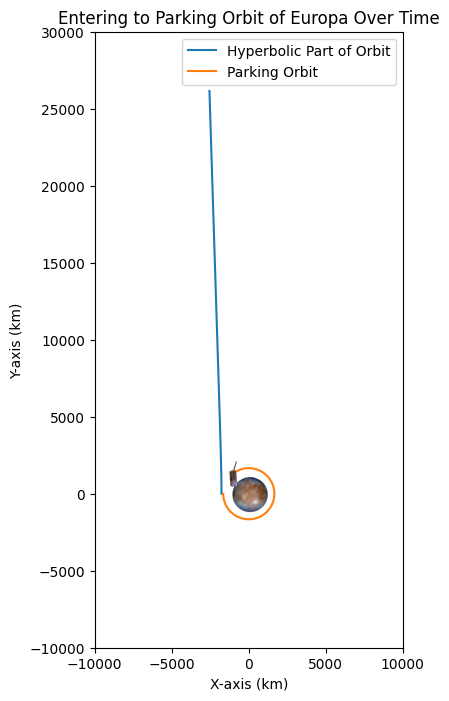

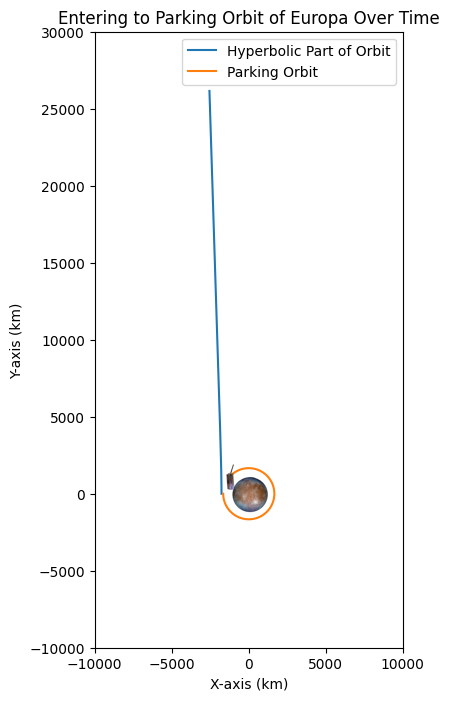

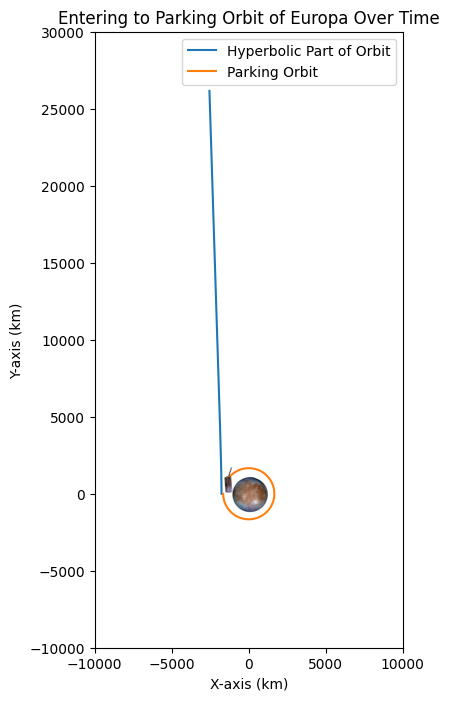

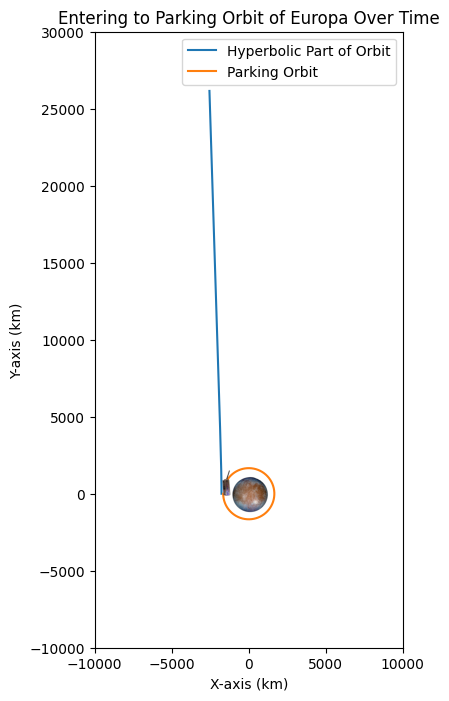

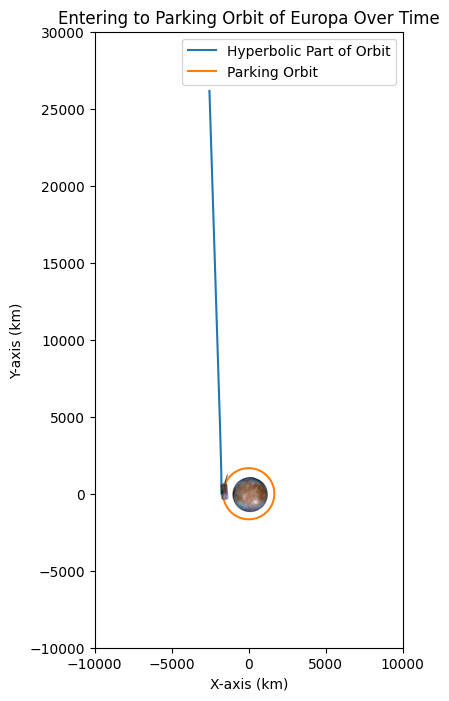

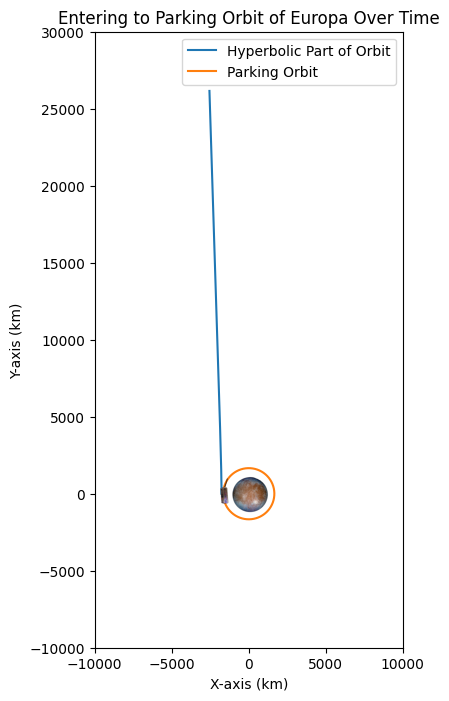

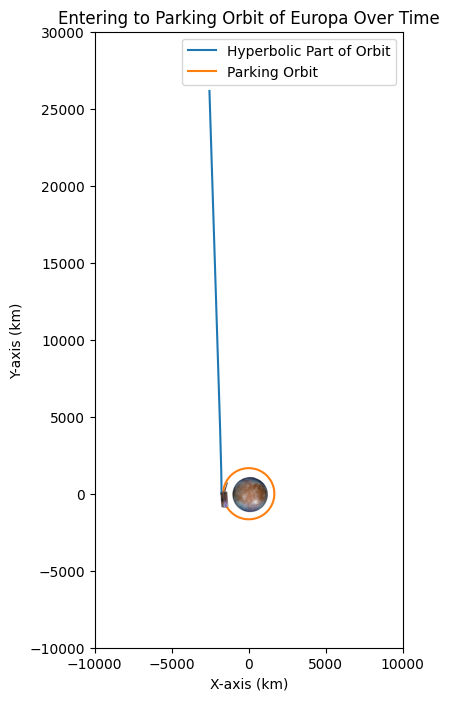

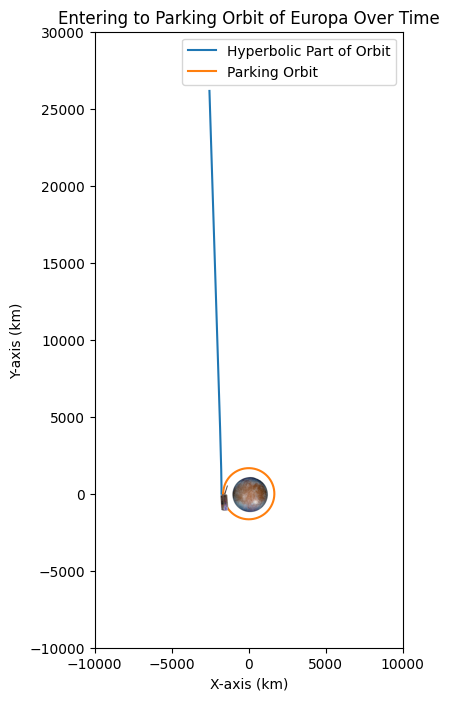

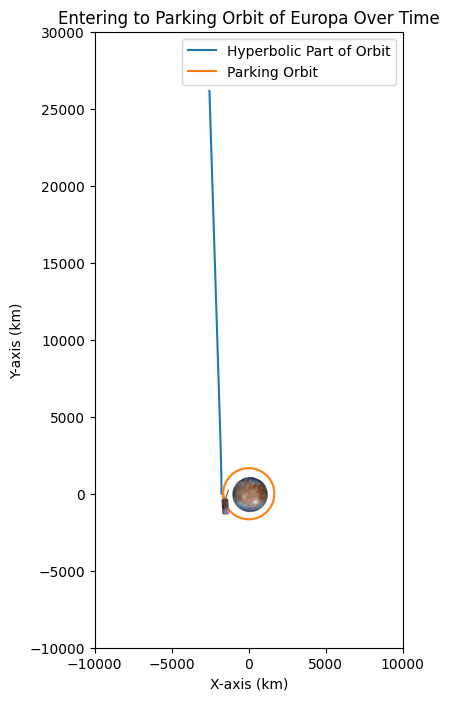

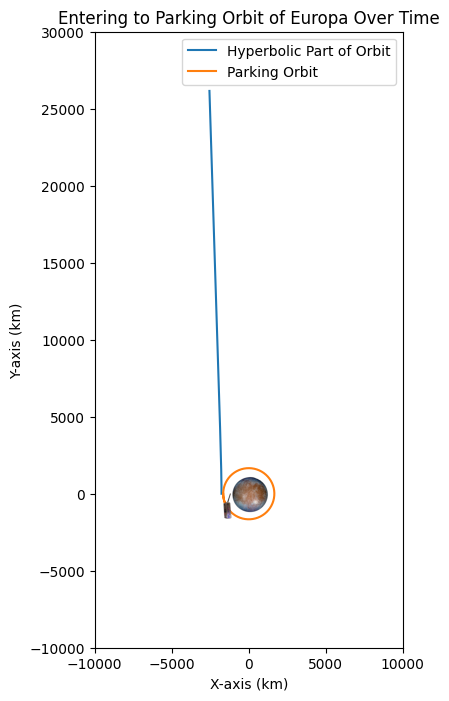

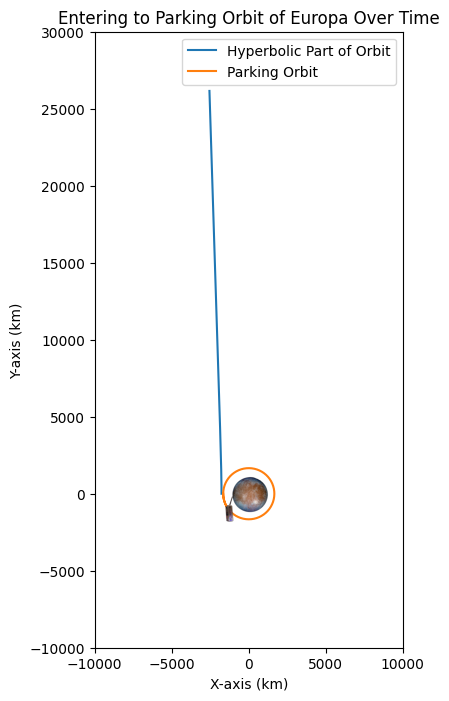

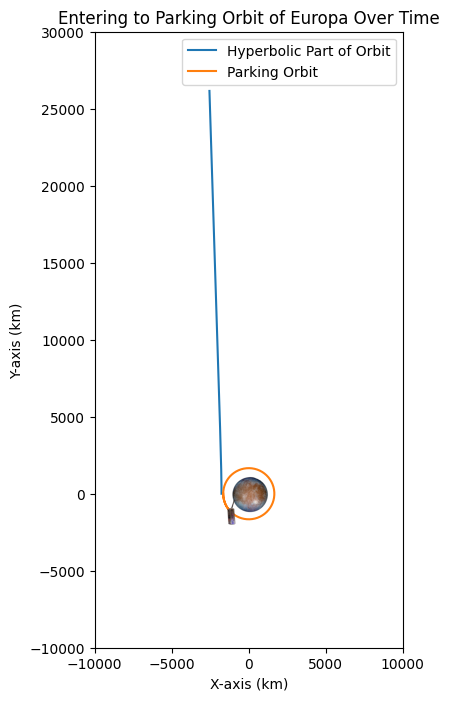

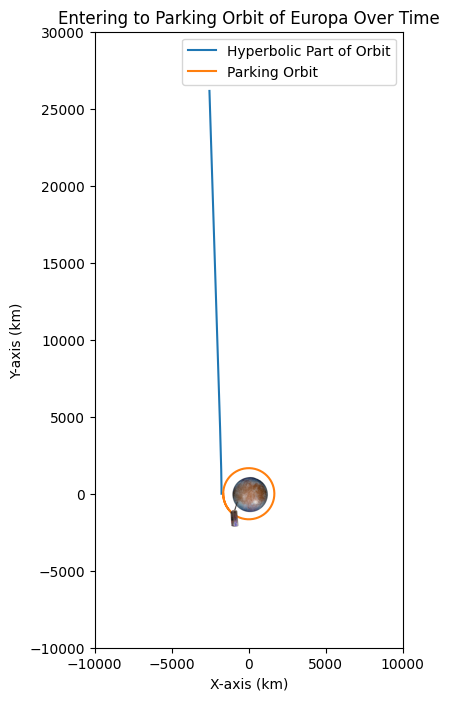

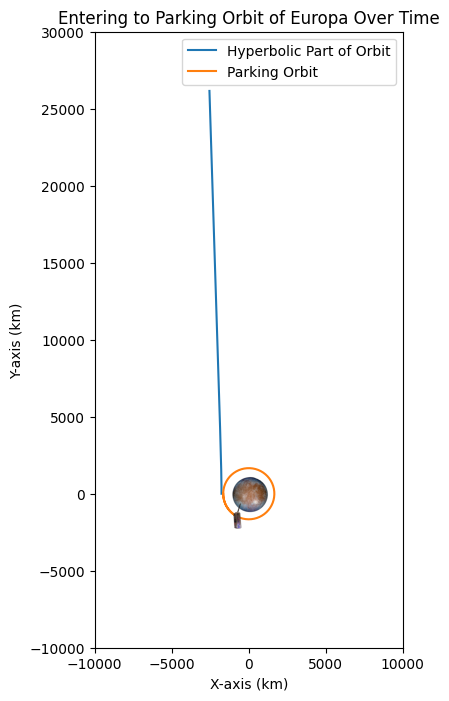

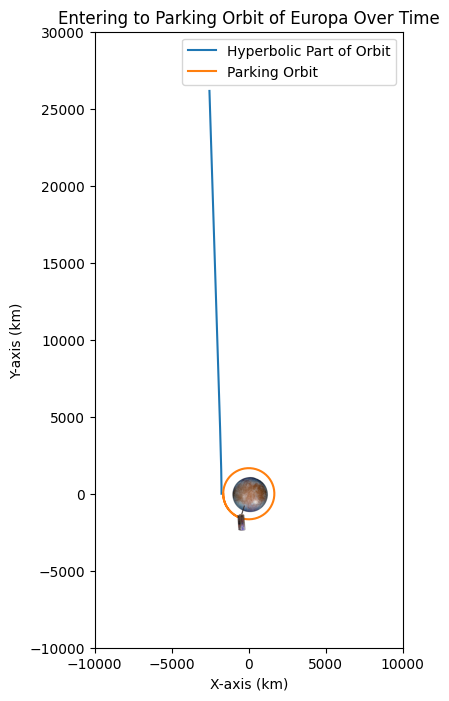

In [168]:
create_animation_park(9000,r_parking_europa,v_parking_europa,h_parking_europa,h_hyper,e_hyper)